Desenvolver um programa em Python para calcular as frequências naturais de vibração e os modos normais (deslocamentos relativos) de sistemas massa-mola unidimensionais com as massas das pontas presas a paredes por molas, e analisar como variações nas massas e nas constantes de mola influenciam o comportamento do sistema.

 

# Instruções:
### Sistema com duas massas e extremidades fixas:

Modele um sistema de duas massas conectadas por uma mola, com as extremidades também ligadas a paredes por molas adicionais.

Inicialmente, use:

Massas iguais: m_1 = m_2 = 1kg

Constantes de mola iguais: k = 1\,\text{N/m} em todas as molas
 
 -----------------------------------------------------------------------------------------------------------------------------

Em seguida, varie m_2 mantendo m_1 fixo e observe:

 

Mudança nas frequências naturais

Alteração dos modos normais (forma dos deslocamentos relativos)


### Extensão para três massas com extremidades fixas:

 

Modele uma cadeia de três massas ligadas entre si por molas e com molas também conectando a primeira e a última massa a paredes rígidas.

Estude diferentes distribuições de massa:

 

Todas iguais

Apenas uma diferente

Todas diferentes

 

### Analise:

 

Como a variação das massas afeta as frequências

Como se modificam os padrões dos modos normais

 

 

Variação das constantes de mola:

 

Fixe as massas e varie os valores das constantes de mola, incluindo:

 

Molas entre as massas

Molas conectadas às paredes

 

Avalie o efeito nas frequências e nos modos normais.

 

 

### Visualizações Recomendadas:
 

Gráficos das frequências naturais em função da variação de massa ou rigidez

Gráficos dos modos normais (com amplitude relativa de cada massa)

Representações animadas ou estáticas dos modos para diferentes configurações

### Entrega Esperada:
 

Código Python funcional, organizado e comentado

Gráficos representando:

 

Frequências naturais em função dos parâmetros variáveis

Modos normais para diferentes configurações

 

Pequeno relatório (até 300 palavras) interpretando os efeitos observados, com base física

a)

In [5]:
import numpy as np
from numpy.linalg import eig

n = 2 #numero de massas
m = 1 #massa
k = 1 #constante elastica

b = k/m

B = np.array([[b, -b], [-b, b]]) #matriz de coeficientes

Eingen = eig(B) #autovalores e autovetores

l = Eingen[0] #autovalores
v = Eingen[1] #autovetores
print("Autovalores:", l)
print("Autovetores:", v)   

Autovalores: [2. 0.]
Autovetores: [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


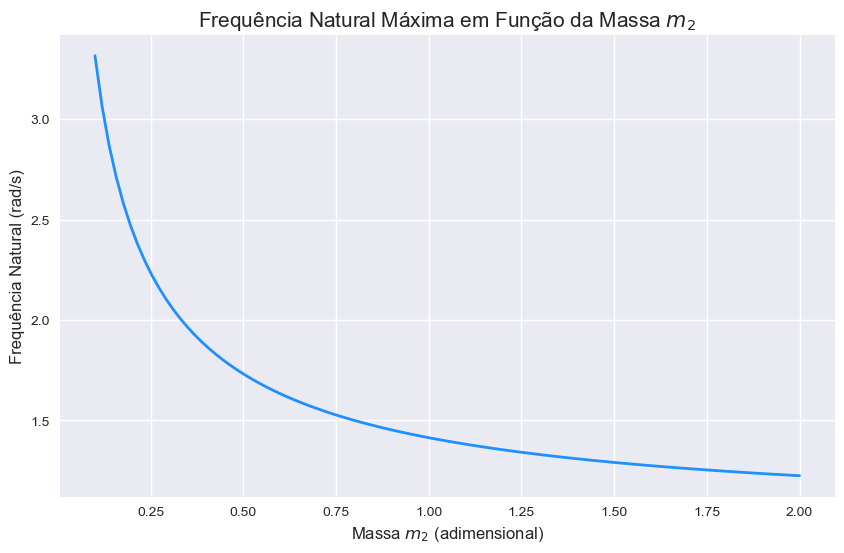

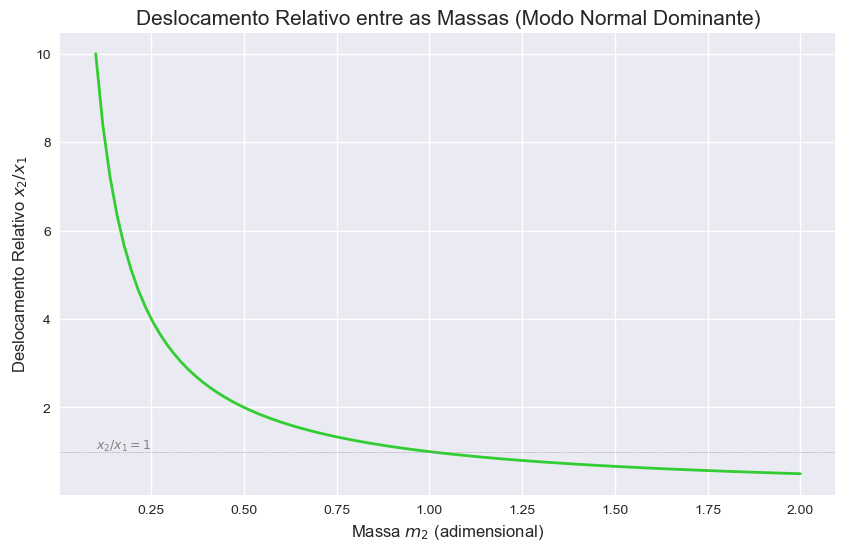

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

m2 = np.linspace(0.1, 2, 100) # Variação da massa m2
m1 = 1  # massa fixa
k = 1   # constante da mola

modos = []
desloc_relativo = []

for m2n in m2:
    # Matriz de coeficientes do sistema
    B = np.array([[k/m1, -k/m1], [-k/m2n, k/m2n]])
    autovalores, autovetores = eig(B)
    
    # Seleciona o maior autovalor (frequência natural máxima)
    idx = np.argmax(autovalores)
    freq_natural = np.sqrt(autovalores[idx])
    modos.append(freq_natural)
    
    # Autovetor correspondente ao maior autovalor (modo normal)
    modo_normal = autovetores[:, idx]
    # Normaliza para que o deslocamento da primeira massa seja 1
    # Multiplicar por -1 para garantir que a primeira massa tenha um deslocamento positivo se preferir
    modo_normal = -1 * modo_normal / modo_normal[0] 
    # Guarda o deslocamento relativo entre as massas (deslocamento de m2 quando m1 é 1)
    desloc_relativo.append(modo_normal[1])

# --- Gráfico das Frequências Naturais ---
plt.figure(figsize=(10, 6)) # Tamanho da figura
plt.style.use('seaborn-v0_8-darkgrid') # Aplica um estilo moderno

plt.plot(m2, modos, 
         color='dodgerblue', # Cor mais vibrante
         linewidth=2,        # Espessura da linha
         label='Frequência Natural Máxima') # Legenda clara

plt.xlabel('Massa $m_2$ (adimensional)', fontsize=12) # Rótulo do eixo X com notação LaTeX
plt.ylabel('Frequência Natural (rad/s)', fontsize=12) # Rótulo do eixo Y
plt.title('Frequência Natural Máxima em Função da Massa $m_2$', fontsize=15) # Título do gráfico
plt.show()

# --- Gráfico do Deslocamento Relativo ---
plt.figure(figsize=(10, 6)) # Tamanho da figura
plt.style.use('seaborn-v0_8-darkgrid') # Aplica o mesmo estilo

plt.plot(m2, desloc_relativo, 
         color='limegreen', # Outra cor vibrante
         linewidth=2,        # Espessura da linha
         label='Deslocamento Relativo de $m_2$ (quando $x_1=1$)') # Legenda clara

plt.xlabel('Massa $m_2$ (adimensional)', fontsize=12) # Rótulo do eixo X
plt.ylabel('Deslocamento Relativo $x_2/x_1$', fontsize=12) # Rótulo do eixo Y com notação LaTeX
plt.title('Deslocamento Relativo entre as Massas (Modo Normal Dominante)', fontsize=15) # Título do gráfico

plt.axhline(1, color='gray', linestyle=':', linewidth=0.5) # Linha de referência em y=1 (x2/x1=1)
plt.text(m2.min(), 1.05, '$x_2/x_1 = 1$', color='gray', fontsize=9) # Texto para a linha de referência
plt.show()

Autovalores (frequências quadradas): [3. 1.]
Autovetores (modos normais):
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


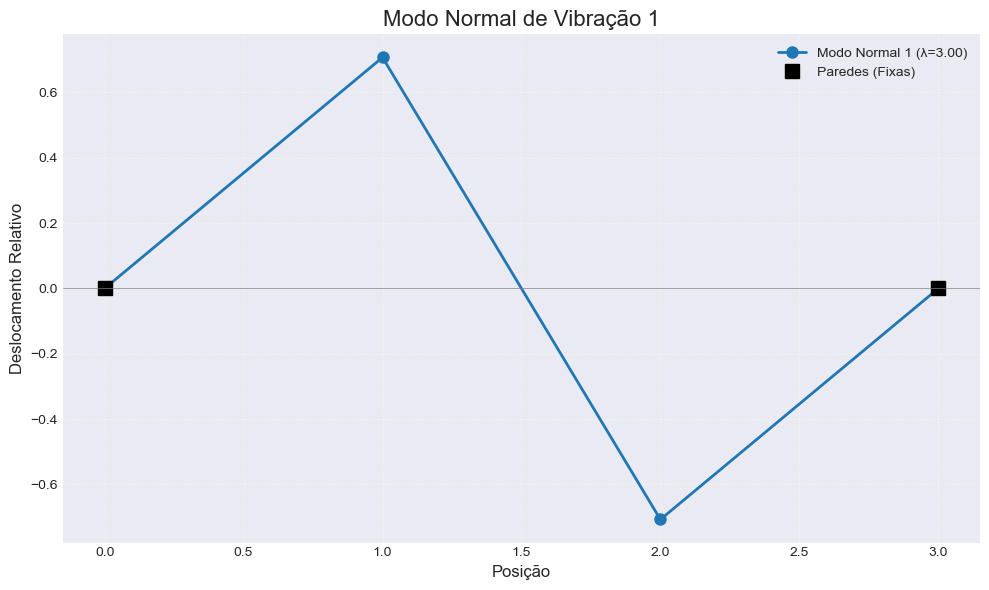

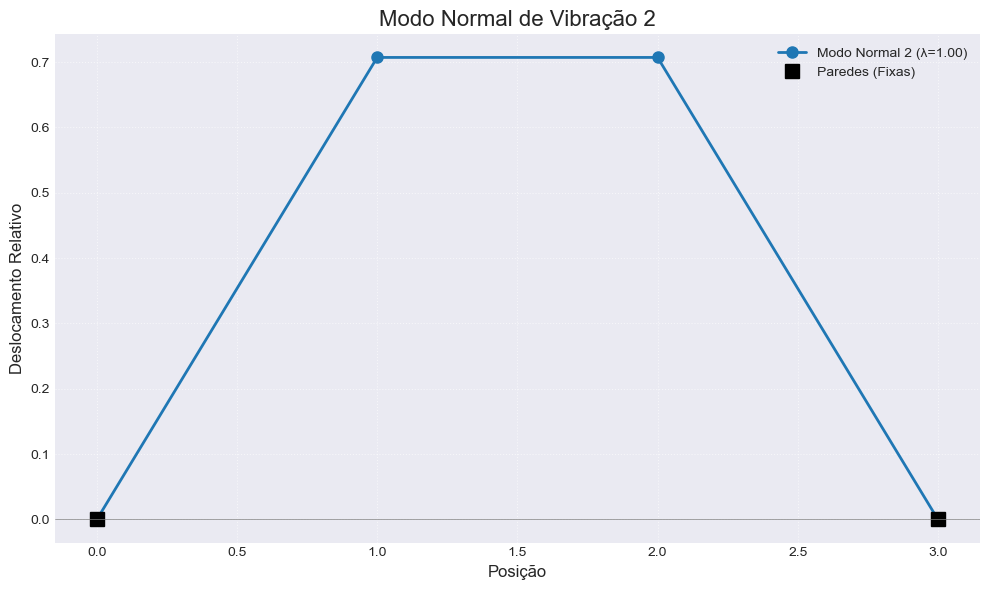

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

# Definindo as massas e as constantes das molas
m1 = 1
m2 = 1
k = 1   # Constante das molas

# Matriz B para três massas com molas de parede diferentes
B = np.array([
    [(2*k) / m1, -k / m1],
    [-k / m2, (2 * k) / m2]
])

# Calculando autovalores e autovetores
autovalores, autovetores = eig(B)

# Posições das massas e das paredes para o gráfico
# Adicionamos pontos para as paredes nas posições 0 e 4
posicao_completa = [0, 1, 2, 3]

# Plotando os modos normais com os pontos da parede
plt.style.use('seaborn-v0_8-darkgrid') # Um estilo limpo para os gráficos

print("Autovalores (frequências quadradas):", autovalores)
print("Autovetores (modos normais):\n", autovetores)

for i in range(len(autovetores[0])):
    plt.figure(figsize=(10, 6))

    # O deslocamento das paredes é sempre zero
    deslocamento_modo = np.insert(autovetores[:, i], 0, 0) # Adiciona 0 no início (parede esquerda)
    deslocamento_modo = np.append(deslocamento_modo, 0)   # Adiciona 0 no final (parede direita)

    # Plotagem da linha e marcadores para o modo normal
    plt.plot(posicao_completa, deslocamento_modo, 'o-',
             label=f'Modo Normal {i+1} (λ={autovalores[i]:.2f})',
             markersize=8, linewidth=2)

    # Plotagem dos pontos que representam as paredes
    plt.plot([0, 3], [0, 0], 's', color='black', markersize=10, label='Paredes (Fixas)')

    # Linha de referência em y=0
    plt.axhline(0, color='gray', lw=0.5, ls='-')

    plt.title(f'Modo Normal de Vibração {i+1}', fontsize=16)
    plt.xlabel('Posição', fontsize=12)
    plt.ylabel('Deslocamento Relativo', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.tight_layout()
    plt.show()

![Fluxo1](ATV4_1.png)

b)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

m3 = 1
m2 = 1
m1 = 1  # massa fixa
k = 1   # constante da mola

B = np.array([[-(k+k)/m1, k/m1, 0], [k/m2, -(k+k)/m2, k/m2], [0, k/m3, -k/m3]])

Eingen = eig(B) #autovalores e autovetores

l = Eingen[0] #autovalores
v = Eingen[1] #autovetores
print("Autovalores:", l)
print("Autovetores:", v)   

Autovalores: [-3.2469796  -1.55495813 -0.19806226]
Autovetores: [[ 0.59100905  0.73697623  0.32798528]
 [-0.73697623  0.32798528  0.59100905]
 [ 0.32798528 -0.59100905  0.73697623]]


<>:48: SyntaxWarning: invalid escape sequence '\o'
<>:52: SyntaxWarning: invalid escape sequence '\o'
<>:56: SyntaxWarning: invalid escape sequence '\o'
<>:62: SyntaxWarning: invalid escape sequence '\o'
<>:48: SyntaxWarning: invalid escape sequence '\o'
<>:52: SyntaxWarning: invalid escape sequence '\o'
<>:56: SyntaxWarning: invalid escape sequence '\o'
<>:62: SyntaxWarning: invalid escape sequence '\o'
C:\Users\luiz.daniel\AppData\Local\Temp\ipykernel_12864\4239295062.py:48: SyntaxWarning: invalid escape sequence '\o'
  label='$\omega_1$ (1º Modo Simétrico)',
C:\Users\luiz.daniel\AppData\Local\Temp\ipykernel_12864\4239295062.py:52: SyntaxWarning: invalid escape sequence '\o'
  label='$\omega_2$ (2º Modo Antissimétrico)',
C:\Users\luiz.daniel\AppData\Local\Temp\ipykernel_12864\4239295062.py:56: SyntaxWarning: invalid escape sequence '\o'
  label='$\omega_3$ (3º Modo Simétrico)',
C:\Users\luiz.daniel\AppData\Local\Temp\ipykernel_12864\4239295062.py:62: SyntaxWarning: invalid escape seq

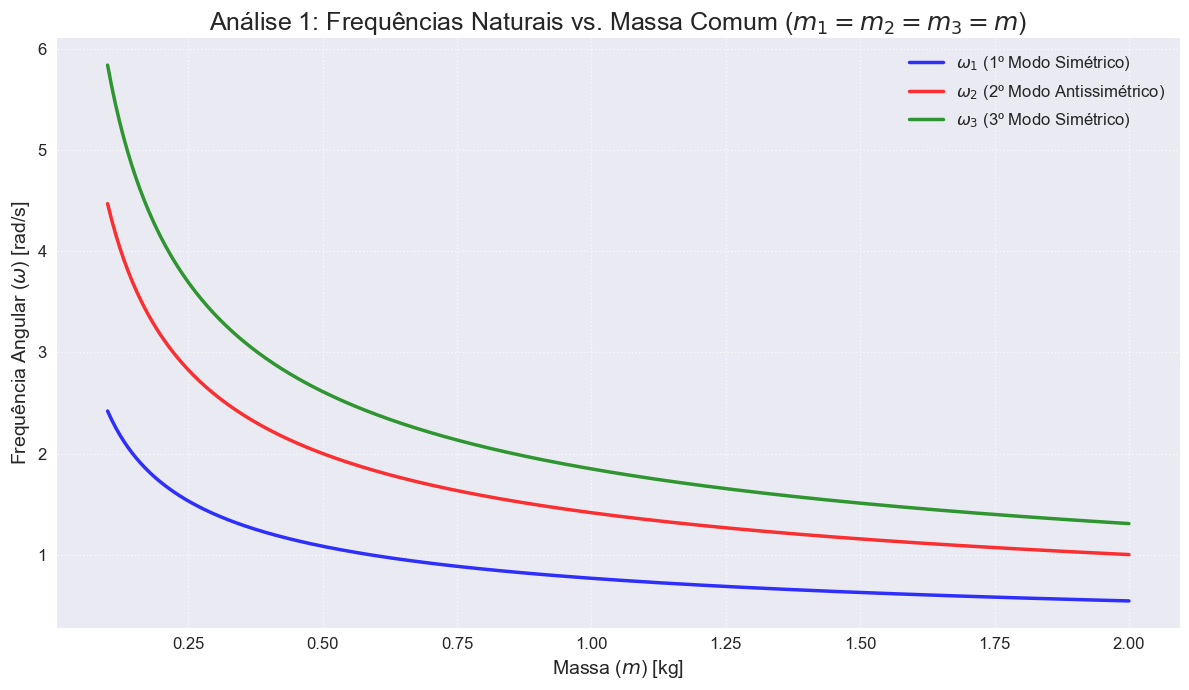

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

# --- ANÁLISE 1: Variando todas as massas igualmente ---
# Aqui, investigamos como as frequências do sistema mudam quando todas as
# massas são idênticas (m1=m2=m3=m) e esse valor 'm' é variado.

k = 1.0  # Constante da mola fixa
massas_iguais_range = np.linspace(0.1, 2.0, 500)  # Faixa de valores para 'm'

# Listas para armazenar as frequências (omega)
omegas_1_analise1, omegas_2_analise1, omegas_3_analise1 = [], [], []

for m in massas_iguais_range:
    # Matriz de Massa M com todas as massas iguais
    M = np.diag([m, m, m])
    
    # Matriz de Rigidez K (permanece a mesma, para molas ligadas às paredes e entre as massas)
    K = k * np.array([
        [ 2, -1,  0],
        [-1,  2, -1],
        [ 0, -1,  2]
    ])
    
    # Resolvemos o problema de autovalor: (M^-1 * K) * A = omega^2 * A
    M_inv = np.linalg.inv(M)
    sistema = np.dot(M_inv, K)
    
    autovalores_quadrados, _ = eig(sistema)
    
    # Ordenamos os autovalores (frequências ao quadrado) para garantir que os gráficos não se cruzem
    autovalores_ordenados = np.sort(autovalores_quadrados)
    
    # Frequências angulares (omega) são a raiz quadrada dos autovalores
    omegas = np.sqrt(autovalores_ordenados)
    
    omegas_1_analise1.append(omegas[0])
    omegas_2_analise1.append(omegas[1])
    omegas_3_analise1.append(omegas[2])

# --- Gráfico da Análise 1: Frequências Naturais vs. Massa (m) ---
plt.figure(figsize=(12, 7)) # Aumenta o tamanho da figura para melhor visualização
plt.style.use('seaborn-v0_8-darkgrid') # Aplica um estilo moderno com grade escura

# Plotando as três frequências com cores e estilos de linha distintos
plt.plot(massas_iguais_range, omegas_1_analise1, 
         label='$\omega_1$ (1º Modo Simétrico)', 
         color='blue', linewidth=2.5, alpha=0.8) # Linha azul sólida

plt.plot(massas_iguais_range, omegas_2_analise1, 
         label='$\omega_2$ (2º Modo Antissimétrico)', 
         color='red', linewidth=2.5, alpha=0.8) # Linha vermelha tracejada

plt.plot(massas_iguais_range, omegas_3_analise1, 
         label='$\omega_3$ (3º Modo Simétrico)', 
         color='green', linewidth=2.5, alpha=0.8) # Linha verde ponto-traço

# Adicionando rótulos e título com notação LaTeX para clareza
plt.title('Análise 1: Frequências Naturais vs. Massa Comum ($m_1=m_2=m_3=m$)', fontsize=18)
plt.xlabel('Massa ($m$) [kg]', fontsize=14)
plt.ylabel('Frequência Angular ($\omega$) [rad/s]', fontsize=14)

# Adicionando legenda e grade
plt.legend(fontsize=12, loc='upper right') # Posição da legenda ajustada para não cobrir o título
plt.grid(True, linestyle=':', alpha=0.7) # Grade mais suave para facilitar a leitura

# Ajustes finais para o layout do gráfico
plt.tick_params(axis='both', which='major', labelsize=12) # Aumenta o tamanho dos ticks dos eixos
plt.tight_layout() # Ajusta automaticamente os parâmetros da subtrama para caber na área da figura
plt.show()

Autovalores (frequências quadradas): [3.41421356 2.         0.58578644]
Autovetores (modos normais):
 [[-5.00000000e-01 -7.07106781e-01  5.00000000e-01]
 [ 7.07106781e-01  5.09486455e-16  7.07106781e-01]
 [-5.00000000e-01  7.07106781e-01  5.00000000e-01]]


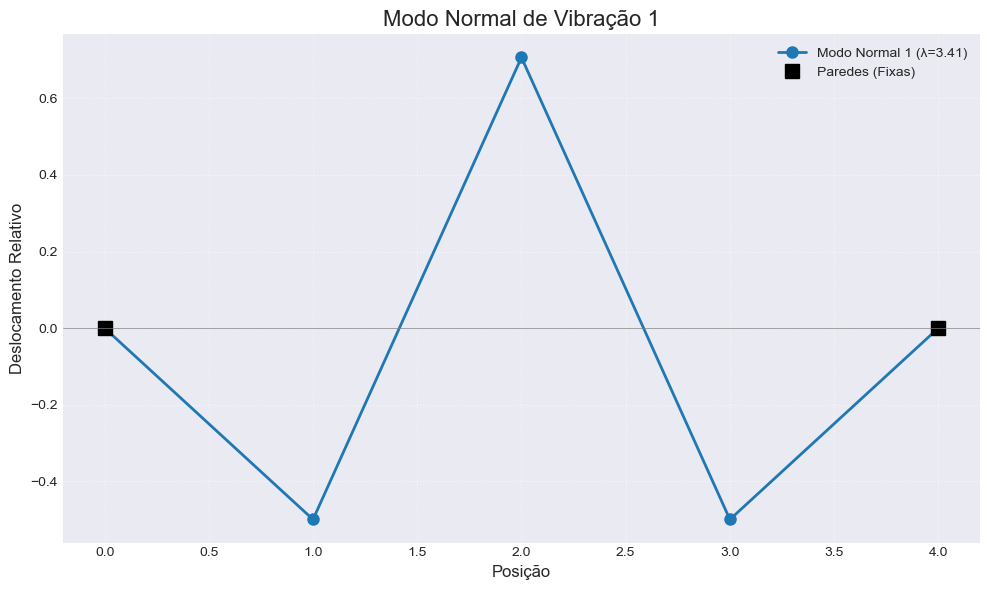

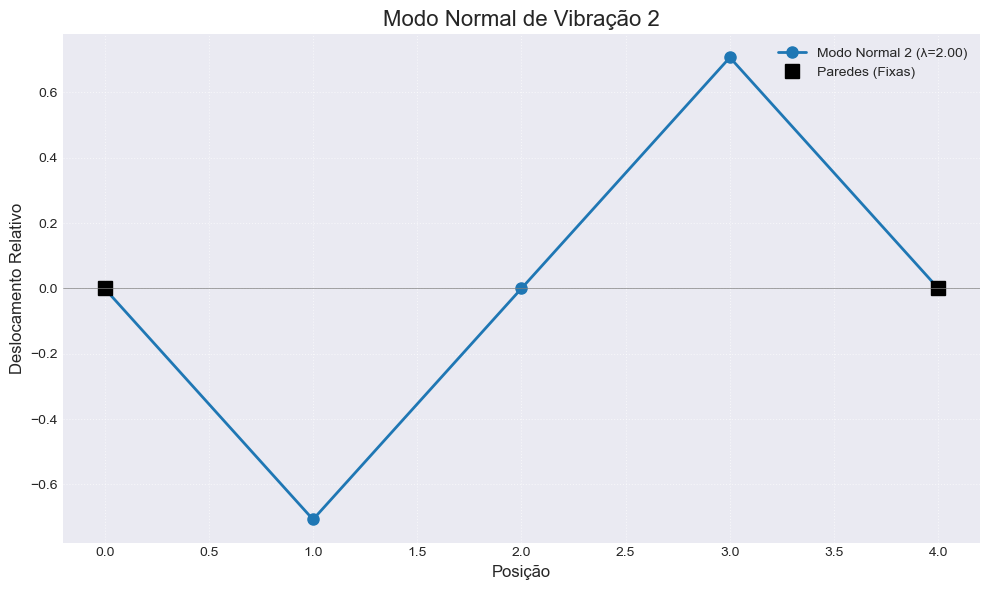

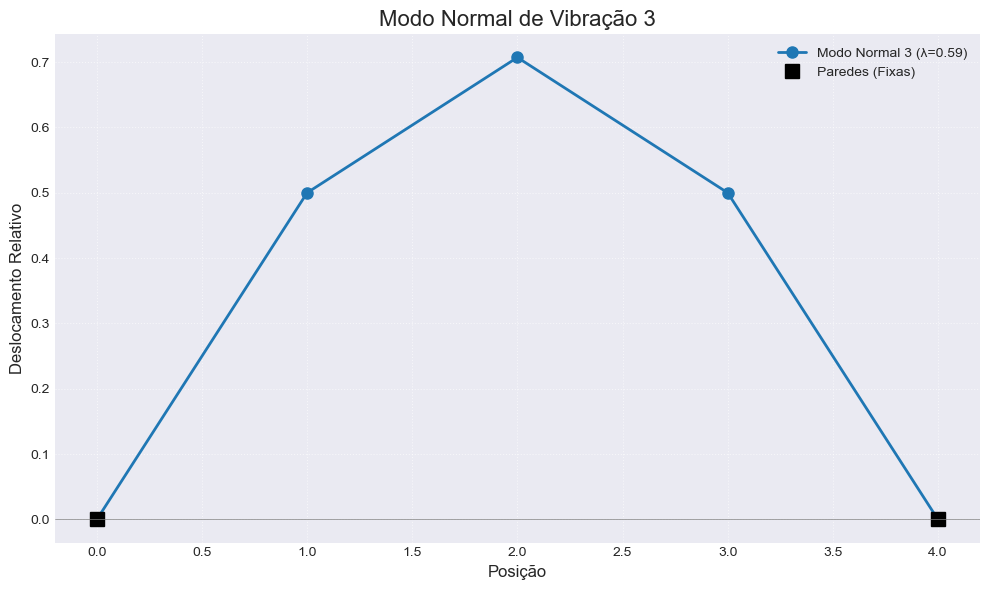

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

# Definindo as massas e as constantes das molas
m1 = 1
m2 = 1
m3 = 1
k = 1   # Constante das molas

# Matriz B para três massas com molas de parede diferentes
B = np.array([
    [(2*k) / m1, -k / m1, 0],
    [-k / m2, (2 * k) / m2, -k / m2],
    [0, -k / m3, (2*k) / m3]
])

# Calculando autovalores e autovetores
autovalores, autovetores = eig(B)

# Posições das massas e das paredes para o gráfico
# Adicionamos pontos para as paredes nas posições 0 e 4
posicao_completa = [0, 1, 2, 3, 4]

# Plotando os modos normais com os pontos da parede
plt.style.use('seaborn-v0_8-darkgrid') # Um estilo limpo para os gráficos

print("Autovalores (frequências quadradas):", autovalores)
print("Autovetores (modos normais):\n", autovetores)

for i in range(len(autovetores[0])):
    plt.figure(figsize=(10, 6))

    # O deslocamento das paredes é sempre zero
    deslocamento_modo = np.insert(autovetores[:, i], 0, 0) # Adiciona 0 no início (parede esquerda)
    deslocamento_modo = np.append(deslocamento_modo, 0)   # Adiciona 0 no final (parede direita)

    # Plotagem da linha e marcadores para o modo normal
    plt.plot(posicao_completa, deslocamento_modo, 'o-',
             label=f'Modo Normal {i+1} (λ={autovalores[i]:.2f})',
             markersize=8, linewidth=2)

    # Plotagem dos pontos que representam as paredes
    plt.plot([0, 4], [0, 0], 's', color='black', markersize=10, label='Paredes (Fixas)')

    # Linha de referência em y=0
    plt.axhline(0, color='gray', lw=0.5, ls='-')

    plt.title(f'Modo Normal de Vibração {i+1}', fontsize=16)
    plt.xlabel('Posição', fontsize=12)
    plt.ylabel('Deslocamento Relativo', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.tight_layout()
    plt.show()

<>:42: SyntaxWarning: invalid escape sequence '\o'
<>:46: SyntaxWarning: invalid escape sequence '\o'
<>:50: SyntaxWarning: invalid escape sequence '\o'
<>:56: SyntaxWarning: invalid escape sequence '\o'
<>:42: SyntaxWarning: invalid escape sequence '\o'
<>:46: SyntaxWarning: invalid escape sequence '\o'
<>:50: SyntaxWarning: invalid escape sequence '\o'
<>:56: SyntaxWarning: invalid escape sequence '\o'
C:\Users\luiz.daniel\AppData\Local\Temp\ipykernel_12864\3063203671.py:42: SyntaxWarning: invalid escape sequence '\o'
  label='$\omega_1$ (1º Modo)',
C:\Users\luiz.daniel\AppData\Local\Temp\ipykernel_12864\3063203671.py:46: SyntaxWarning: invalid escape sequence '\o'
  label='$\omega_2$ (2º Modo Antissimétrico)',
C:\Users\luiz.daniel\AppData\Local\Temp\ipykernel_12864\3063203671.py:50: SyntaxWarning: invalid escape sequence '\o'
  label='$\omega_3$ (3º Modo)',
C:\Users\luiz.daniel\AppData\Local\Temp\ipykernel_12864\3063203671.py:56: SyntaxWarning: invalid escape sequence '\o'
  plt.yla

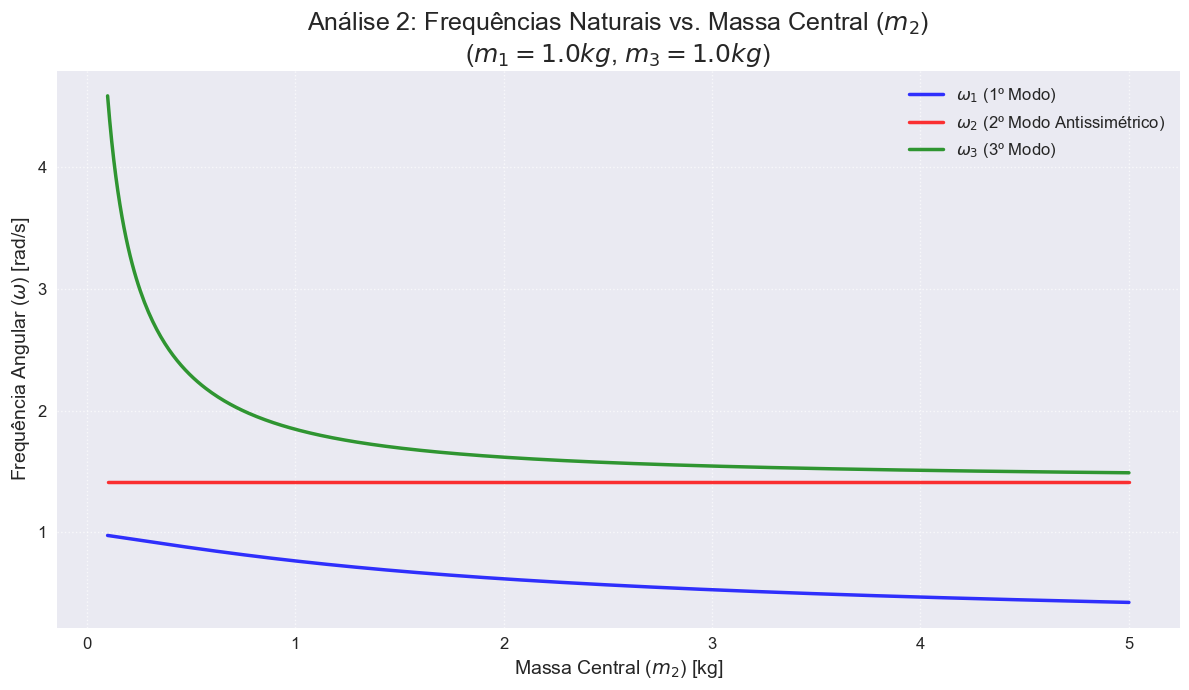

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

# --- ANÁLISE 2: Variando apenas a massa central ---
k = 1.0
m_fixa = 1.0  # Massas das extremidades m1 e m3 fixas em 1.0 kg
massa_central_range = np.linspace(0.1, 5.0, 500) # Faixa de valores para a massa central m2

omegas_1_cenario2, omegas_2_cenario2, omegas_3_cenario2 = [], [], []

for m2 in massa_central_range:
    # Matriz de Massa M com a massa central m2 variando
    M = np.diag([m_fixa, m2, m_fixa])
    
    # Matriz de Rigidez K (constantes das molas são 1.0 N/m e ligadas às paredes)
    K = k * np.array([
        [ 2, -1,  0],
        [-1,  2, -1],
        [ 0, -1,  2]
    ])
    
    # Resolve o sistema M*ddot(x) + K*x = 0 para encontrar os autovalores
    M_inv = np.linalg.inv(M)
    sistema = np.dot(M_inv, K)
    autovalores_quadrados, _ = eig(sistema)
    
    # As frequências naturais são a raiz quadrada dos autovalores
    # As frequências são ordenadas para garantir consistência (omega_1 < omega_2 < omega_3)
    omegas = np.sqrt(np.sort(autovalores_quadrados))
    
    omegas_1_cenario2.append(omegas[0])
    omegas_2_cenario2.append(omegas[1])
    omegas_3_cenario2.append(omegas[2])

# --- Gráfico da Análise 2: Frequências Naturais vs. Massa Central (m2) ---
plt.figure(figsize=(12, 7)) # Aumenta o tamanho da figura para melhor visualização
plt.style.use('seaborn-v0_8-darkgrid') # Aplica um estilo moderno com grade escura

# Plotando as três frequências com cores e estilos de linha distintos
plt.plot(massa_central_range, omegas_1_cenario2, 
         label='$\omega_1$ (1º Modo)', 
         color='blue', linewidth=2.5, alpha=0.8) # Linha azul sólida para o primeiro modo

plt.plot(massa_central_range, omegas_2_cenario2, 
         label='$\omega_2$ (2º Modo Antissimétrico)', 
         color='red', linewidth=2.5, alpha=0.8) # Linha vermelha tracejada para o segundo modo

plt.plot(massa_central_range, omegas_3_cenario2, 
         label='$\omega_3$ (3º Modo)', 
         color='green', linewidth=2.5, alpha=0.8) # Linha verde ponto-traço para o terceiro modo

# Adicionando rótulos e título com notação LaTeX para clareza
plt.title('Análise 2: Frequências Naturais vs. Massa Central ($m_2$)\n($m_1=1.0kg$, $m_3=1.0kg$)', fontsize=18)
plt.xlabel('Massa Central ($m_2$) [kg]', fontsize=14)
plt.ylabel('Frequência Angular ($\omega$) [rad/s]', fontsize=14)

# Adicionando legenda e grade
plt.legend(fontsize=12, loc='upper right') # Posição da legenda ajustada para não cobrir o título
plt.grid(True, linestyle=':', alpha=0.7) # Grade mais suave para facilitar a leitura

# Ajustes finais para o layout do gráfico
plt.tick_params(axis='both', which='major', labelsize=12) # Aumenta o tamanho dos ticks dos eixos
plt.tight_layout() # Ajusta automaticamente os parâmetros da subtrama para caber na área da figura
plt.show()

Autovalores (frequências quadradas): [0.38196601 2.         2.61803399]
Autovetores (modos normais):
 [[-4.65341127e-01  7.07106781e-01  6.47936163e-01]
 [-7.52937760e-01 -1.25313420e-16 -4.00446571e-01]
 [-4.65341127e-01 -7.07106781e-01  6.47936163e-01]]


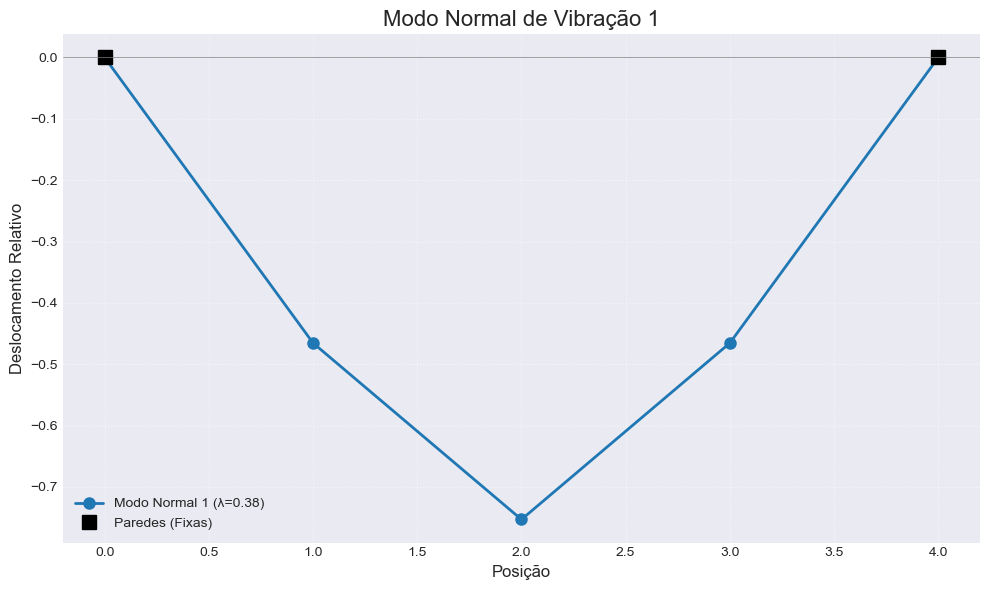

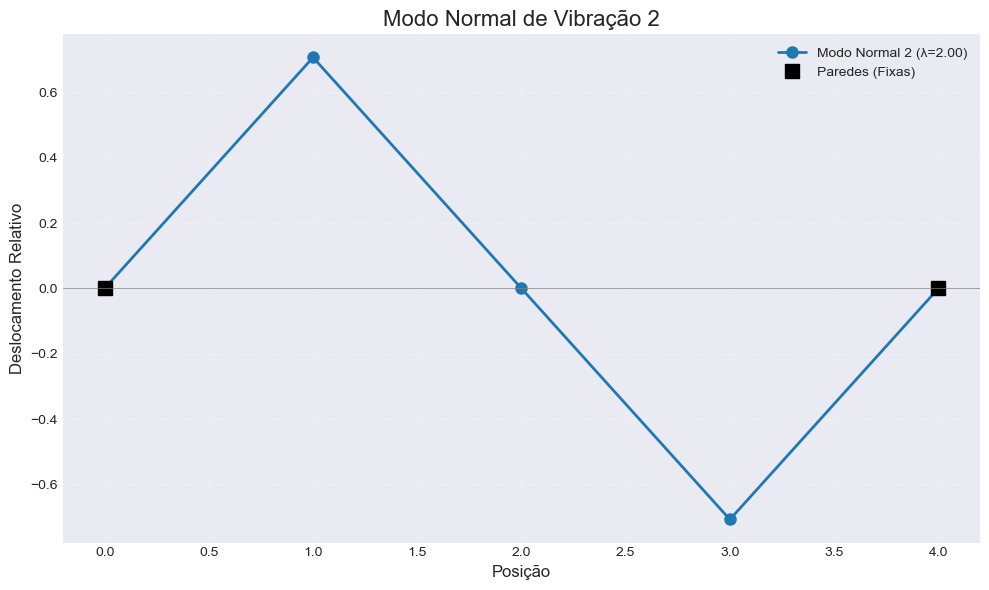

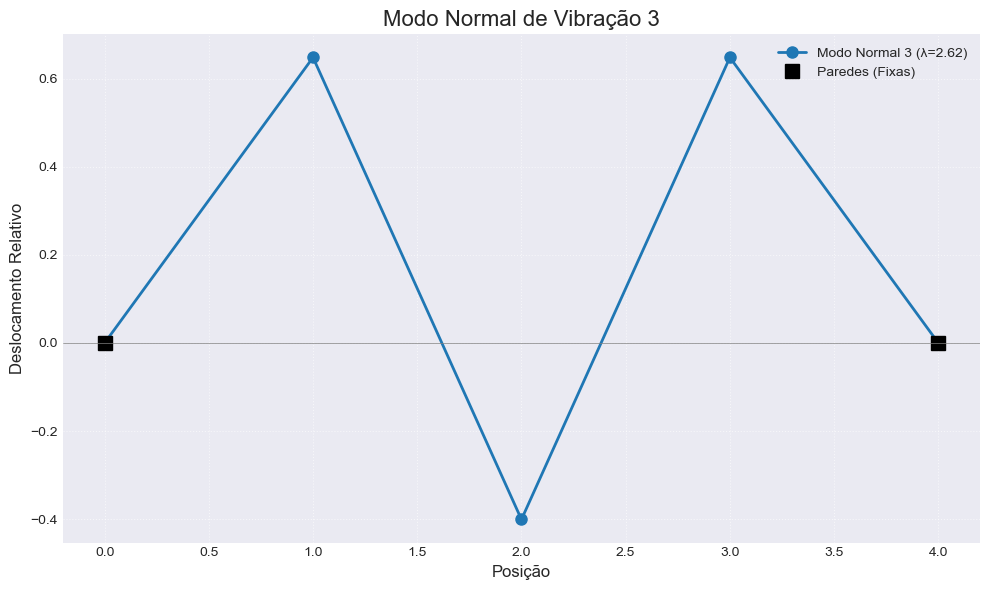

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

# Definindo as massas e as constantes das molas
m1 = 1
m2 = 2
m3 = 1
k = 1   # Constante das molas

# Matriz B para três massas com molas de parede diferentes
B = np.array([
    [(2*k) / m1, -k / m1, 0],
    [-k / m2, (2 * k) / m2, -k / m2],
    [0, -k / m3, (2*k) / m3]
])

# Calculando autovalores e autovetores
autovalores, autovetores = eig(B)

# Posições das massas e das paredes para o gráfico
# Adicionamos pontos para as paredes nas posições 0 e 4
posicao_completa = [0, 1, 2, 3, 4]

# Plotando os modos normais com os pontos da parede
plt.style.use('seaborn-v0_8-darkgrid') # Um estilo limpo para os gráficos

print("Autovalores (frequências quadradas):", autovalores)
print("Autovetores (modos normais):\n", autovetores)

for i in range(len(autovetores[0])):
    plt.figure(figsize=(10, 6))

    # O deslocamento das paredes é sempre zero
    deslocamento_modo = np.insert(autovetores[:, i], 0, 0) # Adiciona 0 no início (parede esquerda)
    deslocamento_modo = np.append(deslocamento_modo, 0)   # Adiciona 0 no final (parede direita)

    # Plotagem da linha e marcadores para o modo normal
    plt.plot(posicao_completa, deslocamento_modo, 'o-',
             label=f'Modo Normal {i+1} (λ={autovalores[i]:.2f})',
             markersize=8, linewidth=2)

    # Plotagem dos pontos que representam as paredes
    plt.plot([0, 4], [0, 0], 's', color='black', markersize=10, label='Paredes (Fixas)')

    # Linha de referência em y=0
    plt.axhline(0, color='gray', lw=0.5, ls='-')

    plt.title(f'Modo Normal de Vibração {i+1}', fontsize=16)
    plt.xlabel('Posição', fontsize=12)
    plt.ylabel('Deslocamento Relativo', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.tight_layout()
    plt.show()

<>:48: SyntaxWarning: invalid escape sequence '\o'
<>:52: SyntaxWarning: invalid escape sequence '\o'
<>:56: SyntaxWarning: invalid escape sequence '\o'
<>:62: SyntaxWarning: invalid escape sequence '\o'
<>:48: SyntaxWarning: invalid escape sequence '\o'
<>:52: SyntaxWarning: invalid escape sequence '\o'
<>:56: SyntaxWarning: invalid escape sequence '\o'
<>:62: SyntaxWarning: invalid escape sequence '\o'
C:\Users\luiz.daniel\AppData\Local\Temp\ipykernel_12864\4229530934.py:48: SyntaxWarning: invalid escape sequence '\o'
  label='$\omega_1$ (1º Modo)',
C:\Users\luiz.daniel\AppData\Local\Temp\ipykernel_12864\4229530934.py:52: SyntaxWarning: invalid escape sequence '\o'
  label='$\omega_2$ (2º Modo)',
C:\Users\luiz.daniel\AppData\Local\Temp\ipykernel_12864\4229530934.py:56: SyntaxWarning: invalid escape sequence '\o'
  label='$\omega_3$ (3º Modo)',
C:\Users\luiz.daniel\AppData\Local\Temp\ipykernel_12864\4229530934.py:62: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel('Frequência

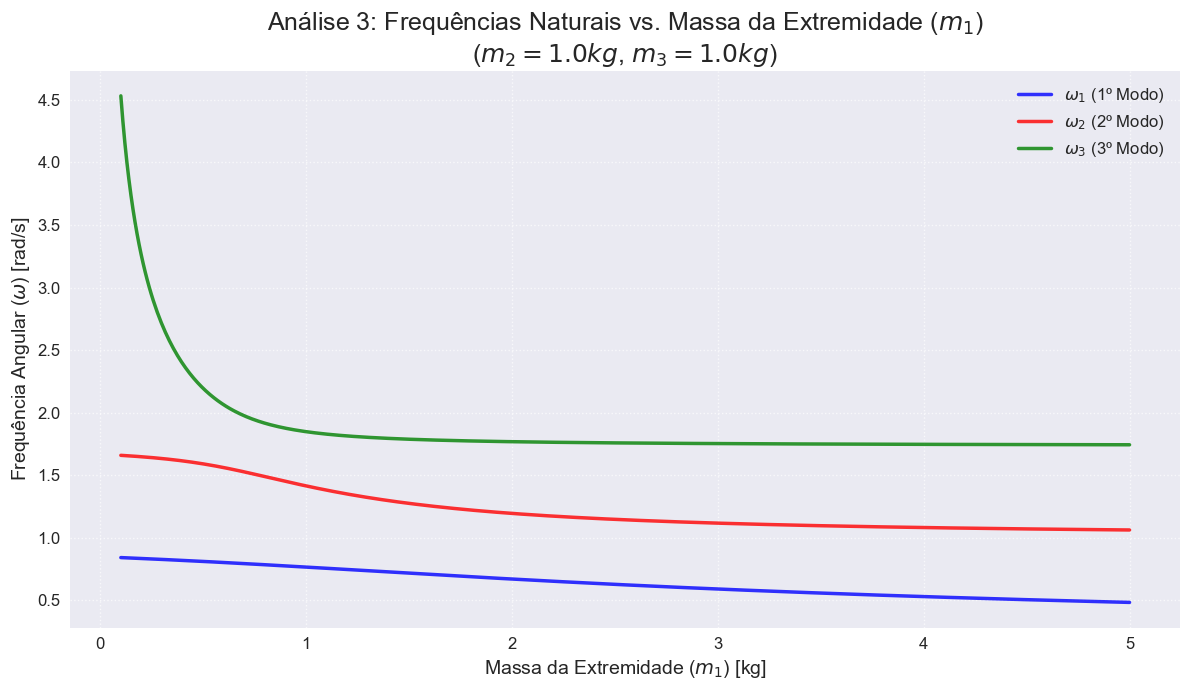

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

# --- ANÁLISE 3: Variando apenas a massa da extremidade (m1) ---
# Mantemos m2 e m3 fixas para ver o efeito da quebra de simetria.

k = 1.0
m2_fixa = 1.0   # Massa central fixa
m3_fixa = 1.0   # Massa da outra extremidade fixa
massa_m1_range = np.linspace(0.1, 5.0, 500) # Faixa de valores para m1

# Listas para armazenar as frequências (omega)
omegas_1_cenario3, omegas_2_cenario3, omegas_3_cenario3 = [], [], []

for m1 in massa_m1_range:
    # Matriz de Massa M com m1 variável
    M = np.diag([m1, m2_fixa, m3_fixa])
    
    # Matriz de Rigidez K (permanece a mesma, para molas ligadas às paredes e entre as massas)
    K = k * np.array([
        [ 2, -1,  0],
        [-1,  2, -1],
        [ 0, -1,  2]
    ])
    
    # Resolve o sistema M*ddot(x) + K*x = 0
    M_inv = np.linalg.inv(M)
    sistema = np.dot(M_inv, K)
    
    # Autovalores do sistema são as frequências angulares ao quadrado (omega^2)
    autovalores_quadrados, _ = eig(sistema)
    
    # As frequências naturais são a raiz quadrada dos autovalores
    # Ordena para garantir que omegas[0] seja omega_1, omegas[1] seja omega_2, etc.
    omegas = np.sqrt(np.sort(autovalores_quadrados))
    
    omegas_1_cenario3.append(omegas[0])
    omegas_2_cenario3.append(omegas[1])
    omegas_3_cenario3.append(omegas[2])

# --- Gráfico da Análise 3: Frequências vs. Massa da Extremidade (m1) ---
plt.figure(figsize=(12, 7)) # Tamanho da figura aumentado para melhor visualização
plt.style.use('seaborn-v0_8-darkgrid') # Estilo com grade escura para um visual moderno

# Plotando as frequências com cores e estilos de linha distintos
plt.plot(massa_m1_range, omegas_1_cenario3, 
         label='$\omega_1$ (1º Modo)', 
         color='blue', linewidth=2.5, alpha=0.8) # Linha azul sólida

plt.plot(massa_m1_range, omegas_2_cenario3, 
         label='$\omega_2$ (2º Modo)', 
         color='red', linewidth=2.5, alpha=0.8) # Linha vermelha tracejada

plt.plot(massa_m1_range, omegas_3_cenario3, 
         label='$\omega_3$ (3º Modo)', 
         color='green', linewidth=2.5, alpha=0.8) # Linha verde ponto-traço

# Adicionando rótulos e título com notação LaTeX
plt.title('Análise 3: Frequências Naturais vs. Massa da Extremidade ($m_1$)\n($m_2=1.0kg$, $m_3=1.0kg$)', fontsize=18)
plt.xlabel('Massa da Extremidade ($m_1$) [kg]', fontsize=14)
plt.ylabel('Frequência Angular ($\omega$) [rad/s]', fontsize=14)

# Adicionando legenda e grid
plt.legend(fontsize=12, loc='upper right') # Posição da legenda ajustada para não cobrir o título
plt.grid(True, linestyle=':', alpha=0.7) # Grade mais suave para facilitar a leitura

# Ajustes finais para o layout
plt.tick_params(axis='both', which='major', labelsize=12) # Tamanho das legendas dos eixos
plt.tight_layout() # Ajusta automaticamente os parâmetros da subtrama para caber na área da figura
plt.show()

Autovalores (frequências quadradas): [3.12457027 1.42681726 0.44861248]
Autovetores (modos normais):
 [[-0.65446171 -0.74965824  0.43089446]
 [ 0.73598818 -0.42969117  0.66848429]
 [-0.17320872  0.50336668  0.60618373]]


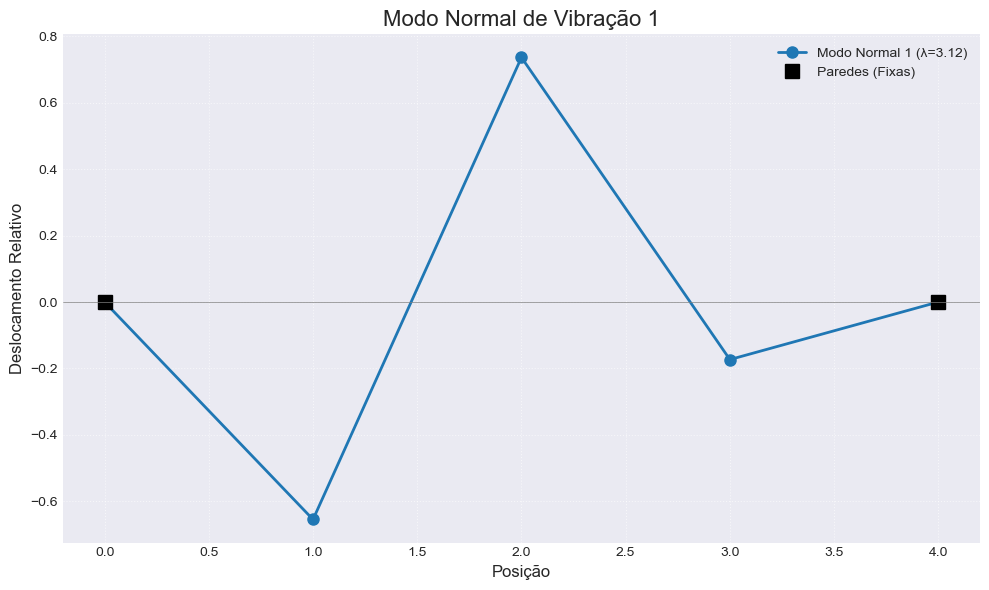

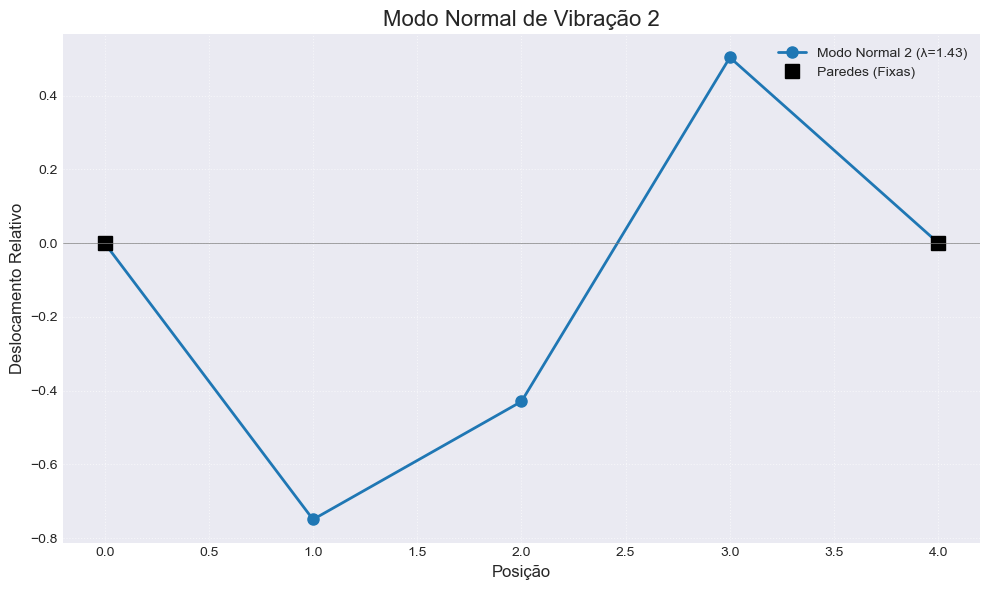

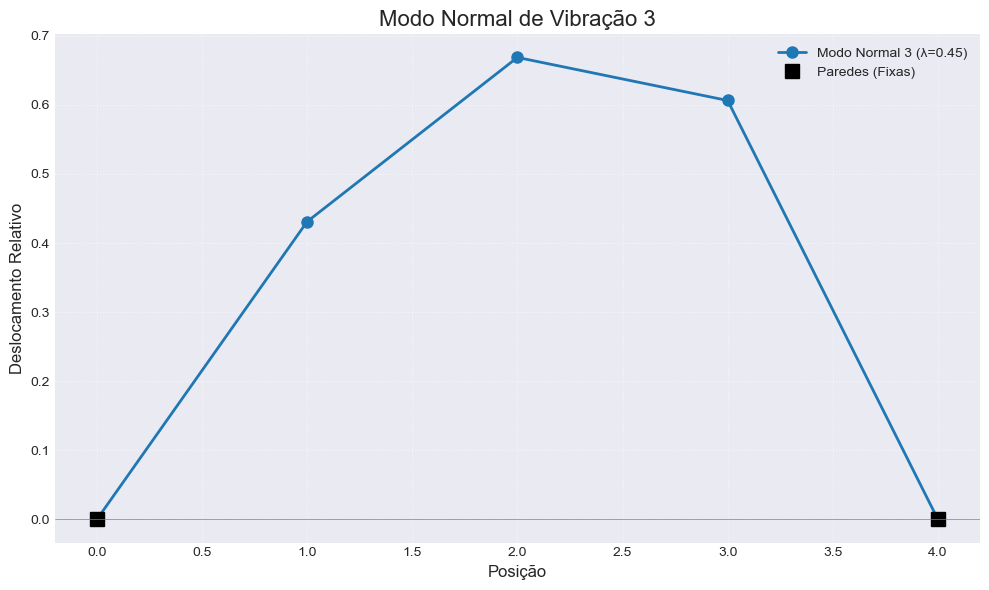

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

# Definindo as massas e as constantes das molas
m1 = 1
m2 = 1
m3 = 2
k = 1   # Constante das molas

# Matriz B para três massas com molas de parede diferentes
B = np.array([
    [(2*k) / m1, -k / m1, 0],
    [-k / m2, (2 * k) / m2, -k / m2],
    [0, -k / m3, (2*k) / m3]
])

# Calculando autovalores e autovetores
autovalores, autovetores = eig(B)

# Posições das massas e das paredes para o gráfico
# Adicionamos pontos para as paredes nas posições 0 e 4
posicao_completa = [0, 1, 2, 3, 4]

# Plotando os modos normais com os pontos da parede
plt.style.use('seaborn-v0_8-darkgrid') # Um estilo limpo para os gráficos

print("Autovalores (frequências quadradas):", autovalores)
print("Autovetores (modos normais):\n", autovetores)

for i in range(len(autovetores[0])):
    plt.figure(figsize=(10, 6))

    # O deslocamento das paredes é sempre zero
    deslocamento_modo = np.insert(autovetores[:, i], 0, 0) # Adiciona 0 no início (parede esquerda)
    deslocamento_modo = np.append(deslocamento_modo, 0)   # Adiciona 0 no final (parede direita)

    # Plotagem da linha e marcadores para o modo normal
    plt.plot(posicao_completa, deslocamento_modo, 'o-',
             label=f'Modo Normal {i+1} (λ={autovalores[i]:.2f})',
             markersize=8, linewidth=2)

    # Plotagem dos pontos que representam as paredes
    plt.plot([0, 4], [0, 0], 's', color='black', markersize=10, label='Paredes (Fixas)')

    # Linha de referência em y=0
    plt.axhline(0, color='gray', lw=0.5, ls='-')

    plt.title(f'Modo Normal de Vibração {i+1}', fontsize=16)
    plt.xlabel('Posição', fontsize=12)
    plt.ylabel('Deslocamento Relativo', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.tight_layout()
    plt.show()

Não é necessário fazer m3 pois o comportamento será igual ao de m1

![Fluxo2](ATV4_2.png)

c)

<>:49: SyntaxWarning: invalid escape sequence '\o'
<>:53: SyntaxWarning: invalid escape sequence '\o'
<>:57: SyntaxWarning: invalid escape sequence '\o'
<>:63: SyntaxWarning: invalid escape sequence '\o'
<>:49: SyntaxWarning: invalid escape sequence '\o'
<>:53: SyntaxWarning: invalid escape sequence '\o'
<>:57: SyntaxWarning: invalid escape sequence '\o'
<>:63: SyntaxWarning: invalid escape sequence '\o'
C:\Users\luiz.daniel\AppData\Local\Temp\ipykernel_12864\321935657.py:49: SyntaxWarning: invalid escape sequence '\o'
  label='$\omega_1$ (1º Modo)',
C:\Users\luiz.daniel\AppData\Local\Temp\ipykernel_12864\321935657.py:53: SyntaxWarning: invalid escape sequence '\o'
  label='$\omega_2$ (2º Modo)',
C:\Users\luiz.daniel\AppData\Local\Temp\ipykernel_12864\321935657.py:57: SyntaxWarning: invalid escape sequence '\o'
  label='$\omega_3$ (3º Modo)',
C:\Users\luiz.daniel\AppData\Local\Temp\ipykernel_12864\321935657.py:63: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel('Frequência Ang

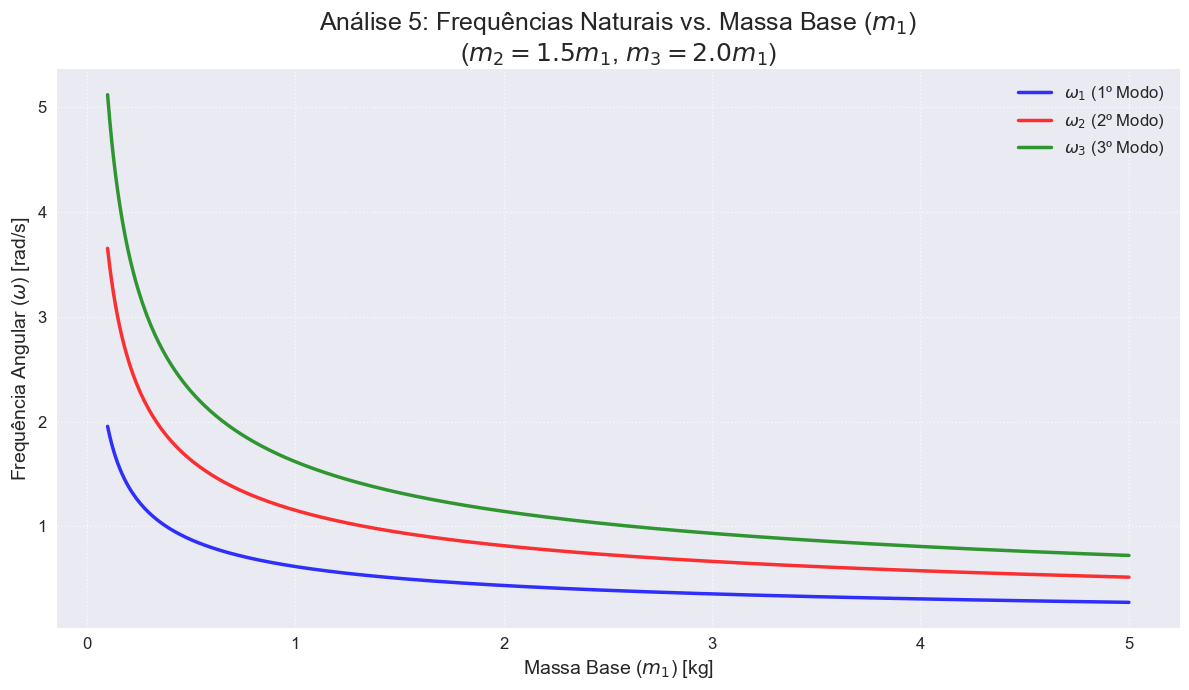

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

k = 1.0
# A faixa de valores agora é para a massa base m1
massa_m1_range = np.linspace(0.1, 5.0, 500) 

# Listas para armazenar as frequências (omega)
omegas_1_cenario5, omegas_2_cenario5, omegas_3_cenario5 = [], [], []

for m1 in massa_m1_range:
    # Define m2 e m3 como funções de m1
    m2 = 1.5 * m1 # Proporção alterada
    m3 = 2.0 * m1 # Proporção alterada
    
    # Matriz de Massa M com todos os valores diferentes
    M = np.diag([m1, m2, m3])
    
    # Matriz de Rigidez K (a mesma, para extremidades fixas - molas ligadas nas paredes)
    # Assumimos que as molas internas e das paredes têm constante k
    K = k * np.array([
        [ 2, -1,  0],
        [-1,  2, -1],
        [ 0, -1,  2]
    ])
    
    # Resolve o sistema M*ddot(x) + K*x = 0
    M_inv = np.linalg.inv(M)
    sistema = np.dot(M_inv, K)
    
    # Autovalores do sistema são as frequências angulares ao quadrado (omega^2)
    autovalores_quadrados, _ = eig(sistema)
    
    # As frequências naturais são a raiz quadrada dos autovalores
    # Ordena para garantir que omegas[0] seja omega_1, omegas[1] seja omega_2, etc.
    omegas = np.sqrt(np.sort(autovalores_quadrados))
    
    omegas_1_cenario5.append(omegas[0])
    omegas_2_cenario5.append(omegas[1])
    omegas_3_cenario5.append(omegas[2])

# --- Gráfico da Análise 5: Frequências vs. Massa Base (m1) ---
plt.figure(figsize=(12, 7)) # Tamanho da figura aumentado para melhor visualização
plt.style.use('seaborn-v0_8-darkgrid') # Estilo com grade escura para um visual moderno

# Plotando as frequências com cores e estilos de linha distintos
plt.plot(massa_m1_range, omegas_1_cenario5, 
         label='$\omega_1$ (1º Modo)', 
         color='blue', linewidth=2.5, alpha=0.8) # Linha azul sólida

plt.plot(massa_m1_range, omegas_2_cenario5, 
         label='$\omega_2$ (2º Modo)', 
         color='red', linewidth=2.5, alpha=0.8) # Linha vermelha tracejada

plt.plot(massa_m1_range, omegas_3_cenario5, 
         label='$\omega_3$ (3º Modo)', 
         color='green', linewidth=2.5, alpha=0.8) # Linha verde ponto-traço

# Adicionando rótulos e título com notação LaTeX
plt.title('Análise 5: Frequências Naturais vs. Massa Base ($m_1$)\n($m_2=1.5m_1$, $m_3=2.0m_1$)', fontsize=18)
plt.xlabel('Massa Base ($m_1$) [kg]', fontsize=14)
plt.ylabel('Frequência Angular ($\omega$) [rad/s]', fontsize=14)

# Adicionando legenda e grid
plt.legend(fontsize=12, loc='upper right') # Posição da legenda ajustada para não cobrir o título
plt.grid(True, linestyle=':', alpha=0.7) # Grade mais suave para facilitar a leitura

# Ajustes finais para o layout
plt.tick_params(axis='both', which='major', labelsize=12) # Tamanho das legendas dos eixos
plt.tight_layout() # Ajusta automaticamente os parâmetros da subtrama para caber na área da figura
plt.show()

Autovalores (frequências quadradas): [2.61803399 1.33333333 0.38196601]
Autovetores (modos normais):
 [[-0.83964254 -0.63960215  0.43308473]
 [ 0.51892763 -0.42640143  0.70074581]
 [-0.16035746  0.63960215  0.56691527]]


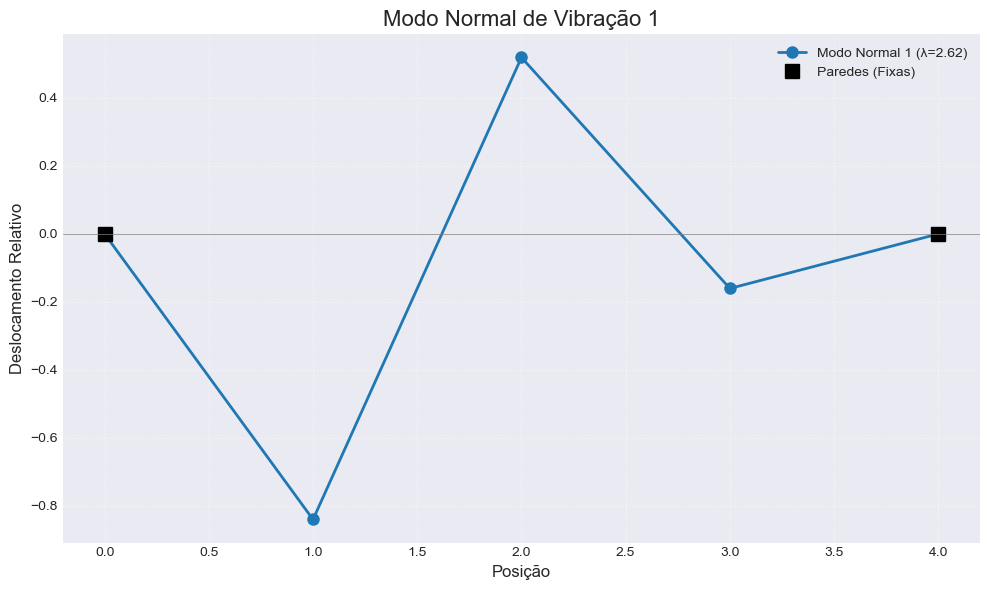

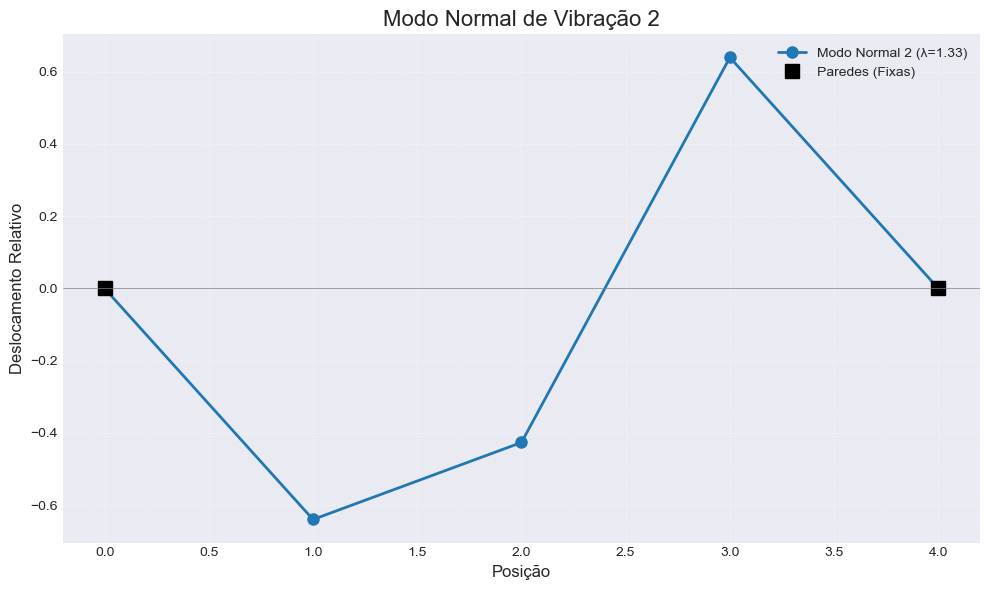

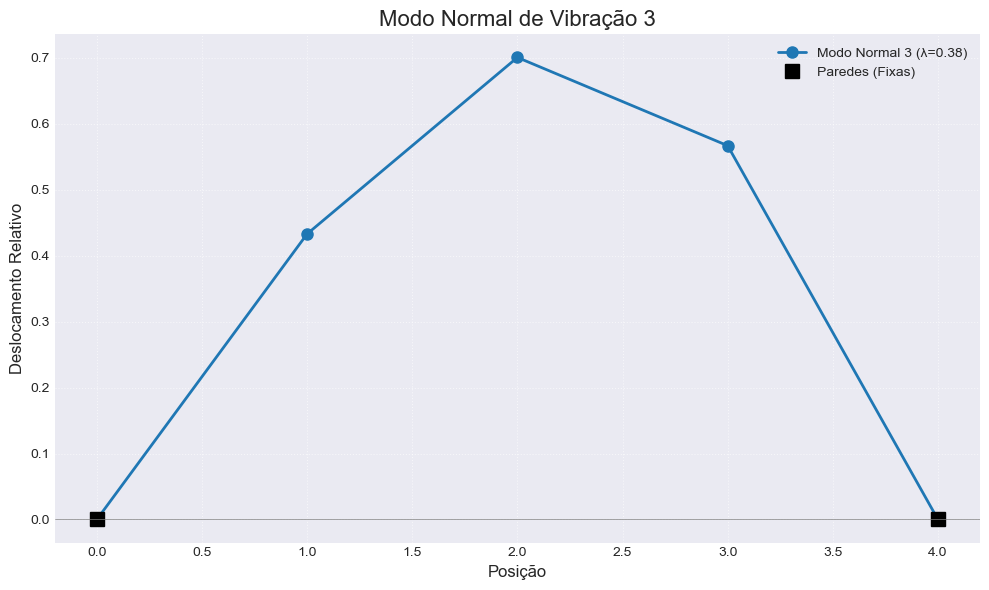

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

# Definindo as massas e as constantes das molas
m1 = 1
m2 = 1.5
m3 = 2
k = 1   # Constante das molas

# Matriz B para três massas com molas de parede diferentes
B = np.array([
    [(2*k) / m1, -k / m1, 0],
    [-k / m2, (2 * k) / m2, -k / m2],
    [0, -k / m3, (2*k) / m3]
])

# Calculando autovalores e autovetores
autovalores, autovetores = eig(B)

# Posições das massas e das paredes para o gráfico
# Adicionamos pontos para as paredes nas posições 0 e 4
posicao_completa = [0, 1, 2, 3, 4]

# Plotando os modos normais com os pontos da parede
plt.style.use('seaborn-v0_8-darkgrid') # Um estilo limpo para os gráficos

print("Autovalores (frequências quadradas):", autovalores)
print("Autovetores (modos normais):\n", autovetores)

for i in range(len(autovetores[0])):
    plt.figure(figsize=(10, 6))

    # O deslocamento das paredes é sempre zero
    deslocamento_modo = np.insert(autovetores[:, i], 0, 0) # Adiciona 0 no início (parede esquerda)
    deslocamento_modo = np.append(deslocamento_modo, 0)   # Adiciona 0 no final (parede direita)

    # Plotagem da linha e marcadores para o modo normal
    plt.plot(posicao_completa, deslocamento_modo, 'o-',
             label=f'Modo Normal {i+1} (λ={autovalores[i]:.2f})',
             markersize=8, linewidth=2)

    # Plotagem dos pontos que representam as paredes
    plt.plot([0, 4], [0, 0], 's', color='black', markersize=10, label='Paredes (Fixas)')

    # Linha de referência em y=0
    plt.axhline(0, color='gray', lw=0.5, ls='-')

    plt.title(f'Modo Normal de Vibração {i+1}', fontsize=16)
    plt.xlabel('Posição', fontsize=12)
    plt.ylabel('Deslocamento Relativo', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.tight_layout()
    plt.show()

<>:49: SyntaxWarning: invalid escape sequence '\o'
<>:53: SyntaxWarning: invalid escape sequence '\o'
<>:57: SyntaxWarning: invalid escape sequence '\o'
<>:63: SyntaxWarning: invalid escape sequence '\o'
<>:49: SyntaxWarning: invalid escape sequence '\o'
<>:53: SyntaxWarning: invalid escape sequence '\o'
<>:57: SyntaxWarning: invalid escape sequence '\o'
<>:63: SyntaxWarning: invalid escape sequence '\o'
C:\Users\luiz.daniel\AppData\Local\Temp\ipykernel_12864\36363021.py:49: SyntaxWarning: invalid escape sequence '\o'
  label='$\omega_1$ (1º Modo)',
C:\Users\luiz.daniel\AppData\Local\Temp\ipykernel_12864\36363021.py:53: SyntaxWarning: invalid escape sequence '\o'
  label='$\omega_2$ (2º Modo)',
C:\Users\luiz.daniel\AppData\Local\Temp\ipykernel_12864\36363021.py:57: SyntaxWarning: invalid escape sequence '\o'
  label='$\omega_3$ (3º Modo)',
C:\Users\luiz.daniel\AppData\Local\Temp\ipykernel_12864\36363021.py:63: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel('Frequência Angular

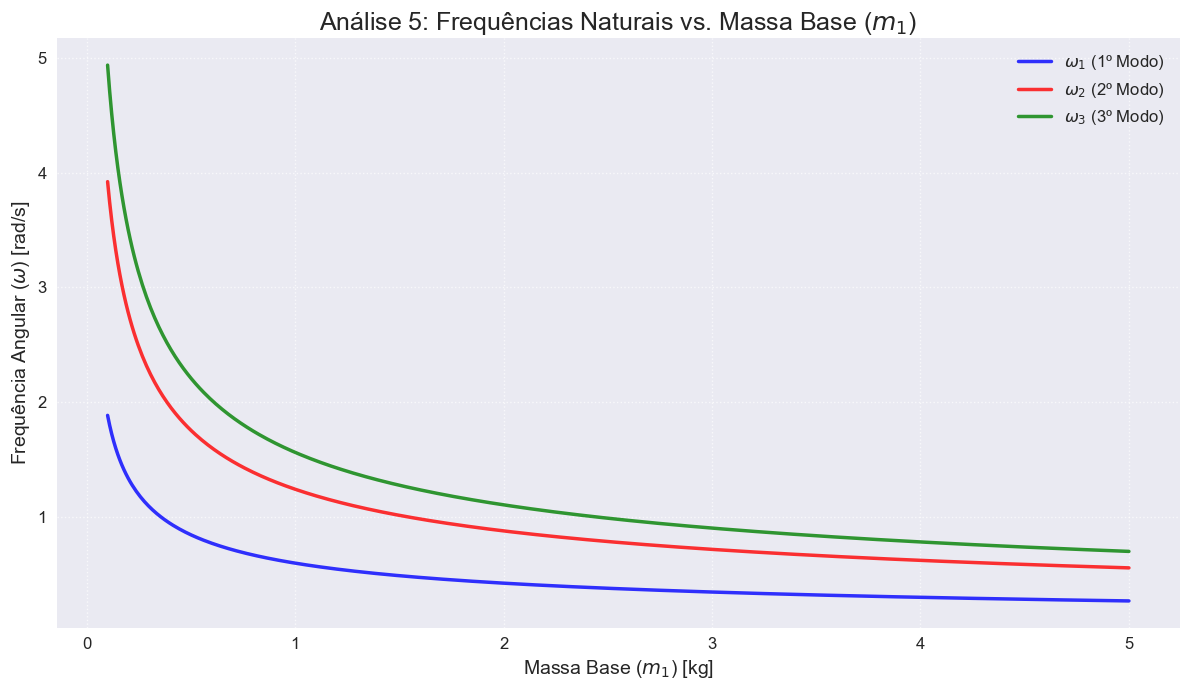

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

k = 1.0
# A faixa de valores agora é para a massa base m1
massa_m1_range = np.linspace(0.1, 5.0, 500) 

# Listas para armazenar as frequências (omega)
omegas_1_cenario5, omegas_2_cenario5, omegas_3_cenario5 = [], [], []

for m1 in massa_m1_range:
    # Define m2 e m3 como funções de m1
    m2 = 2.0 * m1
    m3 = 1.5 * m1
    
    # Matriz de Massa M com todos os valores diferentes
    M = np.diag([m1, m2, m3])
    
    # Matriz de Rigidez K (a mesma, para extremidades fixas - molas ligadas nas paredes)
    # Assumimos que as molas internas e das paredes têm constante k
    K = k * np.array([
        [ 2, -1,  0],
        [-1,  2, -1],
        [ 0, -1,  2]
    ])
    
    # Resolve o sistema M*ddot(x) + K*x = 0
    M_inv = np.linalg.inv(M)
    sistema = np.dot(M_inv, K)
    
    # Autovalores do sistema são as frequências angulares ao quadrado (omega^2)
    autovalores_quadrados, _ = eig(sistema)
    
    # As frequências naturais são a raiz quadrada dos autovalores
    # Ordena para garantir que omegas[0] seja omega_1, omegas[1] seja omega_2, etc.
    omegas = np.sqrt(np.sort(autovalores_quadrados))
    
    omegas_1_cenario5.append(omegas[0])
    omegas_2_cenario5.append(omegas[1])
    omegas_3_cenario5.append(omegas[2])

# --- Gráfico da Análise 5: Frequências vs. Massa Base (m1) ---
plt.figure(figsize=(12, 7)) # Tamanho da figura aumentado
plt.style.use('seaborn-v0_8-darkgrid') # Estilo com grade escura para melhor contraste

# Plotando as frequências com cores e estilos de linha distintos
plt.plot(massa_m1_range, omegas_1_cenario5, 
         label='$\omega_1$ (1º Modo)', 
         color='blue', linewidth=2.5, alpha=0.8)

plt.plot(massa_m1_range, omegas_2_cenario5, 
         label='$\omega_2$ (2º Modo)', 
         color='red', linewidth=2.5, alpha=0.8)

plt.plot(massa_m1_range, omegas_3_cenario5, 
         label='$\omega_3$ (3º Modo)', 
         color='green', linewidth=2.5, alpha=0.8)

# Adicionando rótulos e título
plt.title('Análise 5: Frequências Naturais vs. Massa Base ($m_1$)', fontsize=18)
plt.xlabel('Massa Base ($m_1$) [kg]', fontsize=14)
plt.ylabel('Frequência Angular ($\omega$) [rad/s]', fontsize=14)

# Adicionando legenda e grid
plt.legend(fontsize=12, loc='upper right') # Posição da legenda ajustada
plt.grid(True, linestyle=':', alpha=0.7) # Grid mais suave

# Ajustes finais para o layout
plt.tick_params(axis='both', which='major', labelsize=12) # Tamanho das legendas dos eixos
plt.tight_layout() # Ajusta para evitar cortes
plt.show()

Autovalores (frequências quadradas): [0.35521729 2.43936985 1.5387462 ]
Autovetores (modos normais):
 [[ 0.44891939 -0.88974819 -0.53808904]
 [ 0.73837486  0.39092853 -0.24819561]
 [ 0.5032633  -0.23563329  0.80551792]]


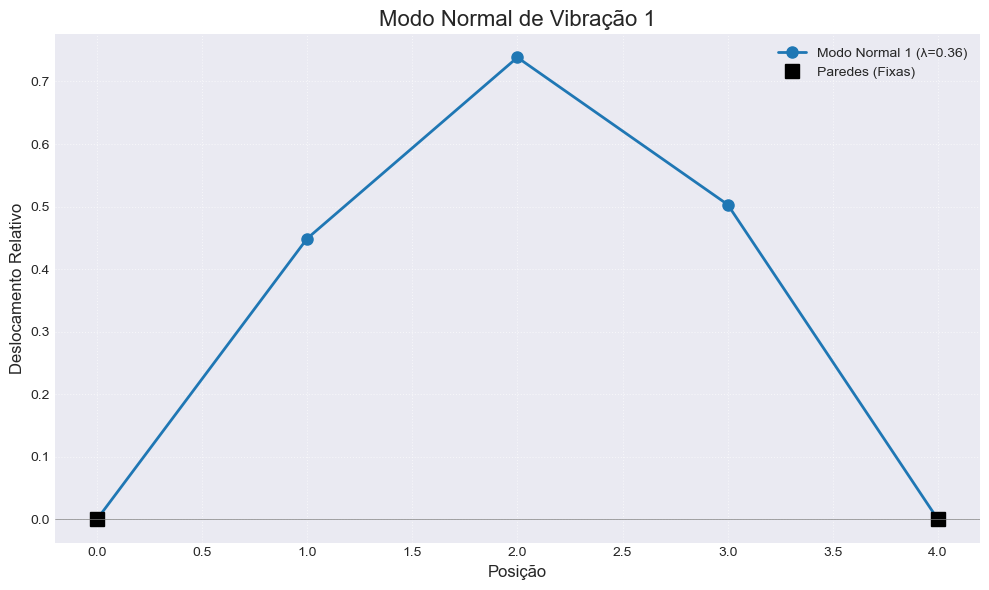

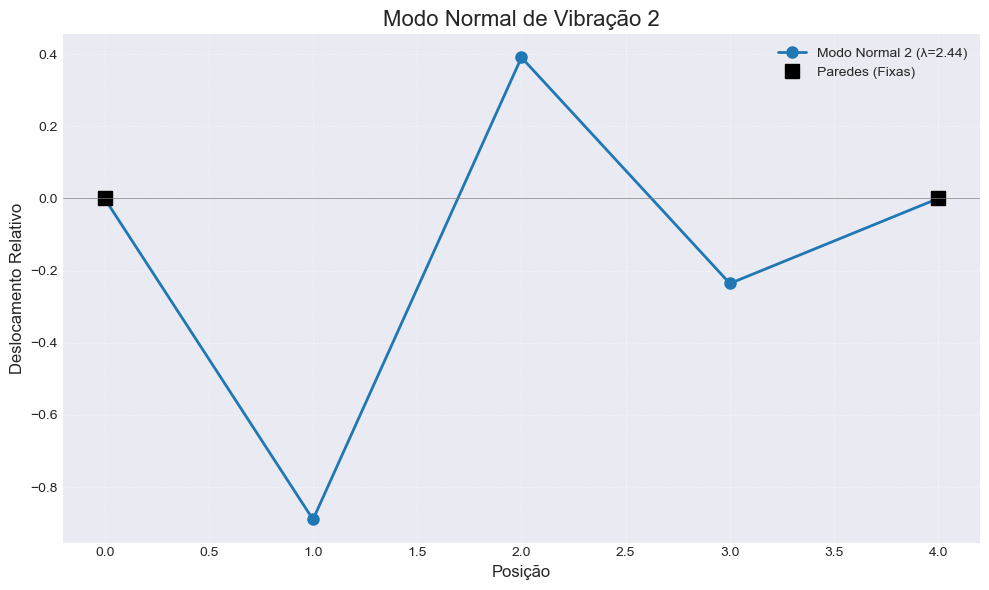

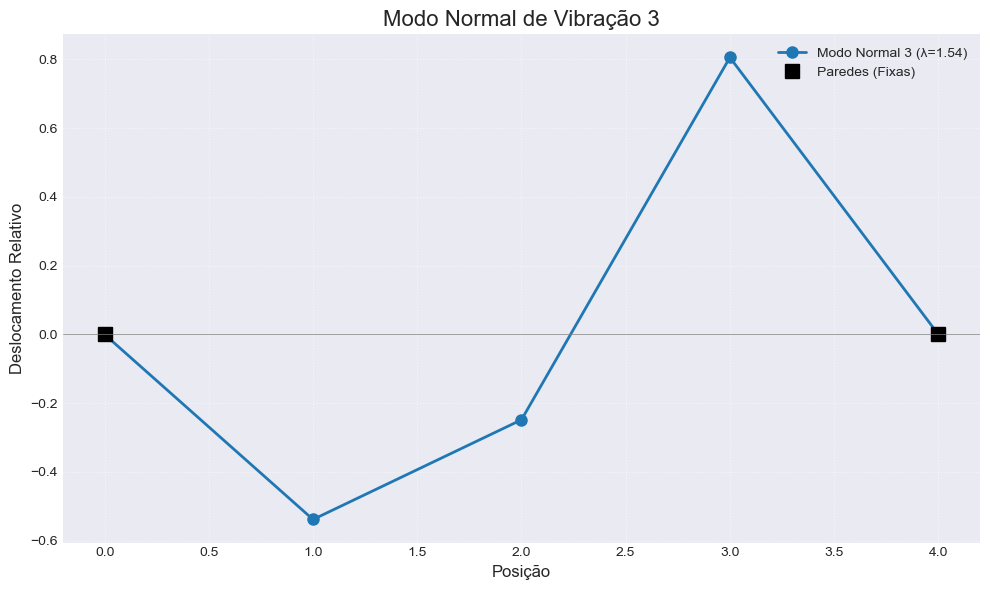

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

# Definindo as massas e as constantes das molas
m1 = 1
m2 = 2
m3 = 1.5
k = 1   # Constante das molas

# Matriz B para três massas com molas de parede diferentes
B = np.array([
    [(2*k) / m1, -k / m1, 0],
    [-k / m2, (2 * k) / m2, -k / m2],
    [0, -k / m3, (2*k) / m3]
])

# Calculando autovalores e autovetores
autovalores, autovetores = eig(B)

# Posições das massas e das paredes para o gráfico
# Adicionamos pontos para as paredes nas posições 0 e 4
posicao_completa = [0, 1, 2, 3, 4]

# Plotando os modos normais com os pontos da parede
plt.style.use('seaborn-v0_8-darkgrid') # Um estilo limpo para os gráficos

print("Autovalores (frequências quadradas):", autovalores)
print("Autovetores (modos normais):\n", autovetores)

for i in range(len(autovetores[0])):
    plt.figure(figsize=(10, 6))

    # O deslocamento das paredes é sempre zero
    deslocamento_modo = np.insert(autovetores[:, i], 0, 0) # Adiciona 0 no início (parede esquerda)
    deslocamento_modo = np.append(deslocamento_modo, 0)   # Adiciona 0 no final (parede direita)

    # Plotagem da linha e marcadores para o modo normal
    plt.plot(posicao_completa, deslocamento_modo, 'o-',
             label=f'Modo Normal {i+1} (λ={autovalores[i]:.2f})',
             markersize=8, linewidth=2)

    # Plotagem dos pontos que representam as paredes
    plt.plot([0, 4], [0, 0], 's', color='black', markersize=10, label='Paredes (Fixas)')

    # Linha de referência em y=0
    plt.axhline(0, color='gray', lw=0.5, ls='-')

    plt.title(f'Modo Normal de Vibração {i+1}', fontsize=16)
    plt.xlabel('Posição', fontsize=12)
    plt.ylabel('Deslocamento Relativo', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.tight_layout()
    plt.show()

c)

![FLuxo3](ATV4_3.png)

<>:44: SyntaxWarning: invalid escape sequence '\o'
<>:48: SyntaxWarning: invalid escape sequence '\o'
<>:52: SyntaxWarning: invalid escape sequence '\o'
<>:58: SyntaxWarning: invalid escape sequence '\o'
<>:44: SyntaxWarning: invalid escape sequence '\o'
<>:48: SyntaxWarning: invalid escape sequence '\o'
<>:52: SyntaxWarning: invalid escape sequence '\o'
<>:58: SyntaxWarning: invalid escape sequence '\o'
C:\Users\luiz.daniel\AppData\Local\Temp\ipykernel_12864\974505402.py:44: SyntaxWarning: invalid escape sequence '\o'
  label='$\omega_1$ (Modo 1 - Menor Frequência)',
C:\Users\luiz.daniel\AppData\Local\Temp\ipykernel_12864\974505402.py:48: SyntaxWarning: invalid escape sequence '\o'
  label='$\omega_2$ (Modo 2 - Frequência Média)',
C:\Users\luiz.daniel\AppData\Local\Temp\ipykernel_12864\974505402.py:52: SyntaxWarning: invalid escape sequence '\o'
  label='$\omega_3$ (Modo 3 - Maior Frequência)',
C:\Users\luiz.daniel\AppData\Local\Temp\ipykernel_12864\974505402.py:58: SyntaxWarning: inv

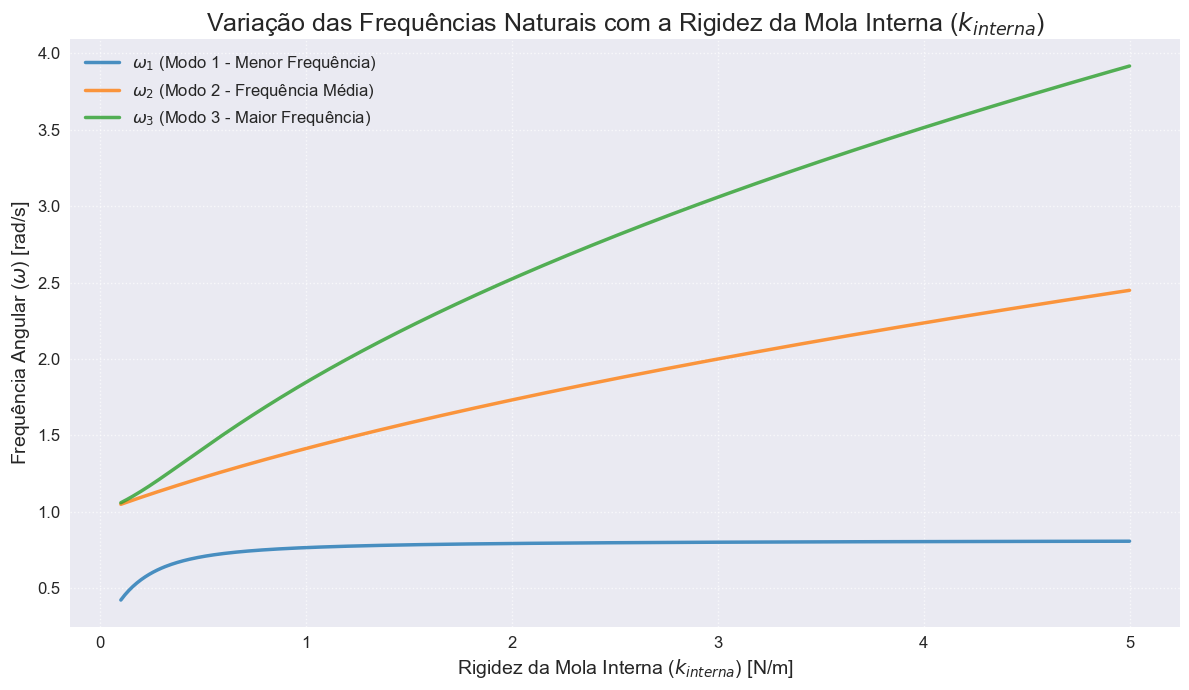

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

# --- ANÁLISE 6: Variando as Molas Internas Simetricamente ---
massas = np.array([1.0, 1.0, 1.0])  # Massas fixas
M = np.diag(massas)

k_fixa_parede = 1.0  # Molas das paredes constantes
k_interna_range = np.linspace(0.1, 5.0, 500) # Intervalo da rigidez das molas internas

omegas_1, omegas_2, omegas_3 = [], [], []

for k_interna in k_interna_range:
    # Matriz de Rigidez K com molas internas variáveis
    K = np.array([
        [k_fixa_parede + k_interna, -k_interna, 0],
        [-k_interna, k_interna + k_interna, -k_interna],
        [0, -k_interna, k_interna + k_fixa_parede]
    ])
    
    # Resolve o sistema M*ddot(x) + K*x = 0
    # Equivalente a ddot(x) = -inv(M)*K*x
    M_inv = np.linalg.inv(M)
    sistema = np.dot(M_inv, K)
    
    # Autovalores do sistema são as frequências angulares ao quadrado (omega^2)
    autovalores_quadrados, _ = eig(sistema)
    
    # As frequências naturais são a raiz quadrada dos autovalores
    # Ordena para garantir que omegas[0] seja omega_1, omegas[1] seja omega_2, etc.
    omegas = np.sqrt(np.sort(autovalores_quadrados)) 
    
    omegas_1.append(omegas[0])
    omegas_2.append(omegas[1])
    omegas_3.append(omegas[2])

# --- Gráfico das Frequências vs. Rigidez das Molas Internas ---
plt.figure(figsize=(12, 7)) # Aumenta o tamanho da figura
plt.style.use('seaborn-v0_8-darkgrid') # Aplica um estilo moderno com grade

# Plotando as frequências com cores e estilos de linha distintos
plt.plot(k_interna_range, omegas_1, 
         label='$\omega_1$ (Modo 1 - Menor Frequência)', 
         color='#1f77b4', linewidth=2.5, alpha=0.8) # Azul padrão matplotlib

plt.plot(k_interna_range, omegas_2, 
         label='$\omega_2$ (Modo 2 - Frequência Média)', 
         color='#ff7f0e', linewidth=2.5, alpha=0.8) # Laranja padrão matplotlib, tracejada

plt.plot(k_interna_range, omegas_3, 
         label='$\omega_3$ (Modo 3 - Maior Frequência)', 
         color='#2ca02c', linewidth=2.5, alpha=0.8) # Verde padrão matplotlib, ponto-traço

# Adicionando rótulos e título
plt.title('Variação das Frequências Naturais com a Rigidez da Mola Interna ($k_{interna}$)', fontsize=18)
plt.xlabel('Rigidez da Mola Interna ($k_{interna}$) [N/m]', fontsize=14)
plt.ylabel('Frequência Angular ($\omega$) [rad/s]', fontsize=14)

# Adicionando legenda e grid
plt.legend(fontsize=12, loc='upper left') # Posição da legenda
plt.grid(True, linestyle=':', alpha=0.7) # Grade mais suave

# Ajustes finais para o layout
plt.tick_params(axis='both', which='major', labelsize=12) # Tamanho das legendas dos eixos
plt.tight_layout() # Ajusta para evitar cortes
plt.show()

Autovalores (frequências quadradas): [3.41421356 2.         0.58578644]
Autovetores (modos normais):
 [[-5.00000000e-01 -7.07106781e-01  5.00000000e-01]
 [ 7.07106781e-01  5.09486455e-16  7.07106781e-01]
 [-5.00000000e-01  7.07106781e-01  5.00000000e-01]]


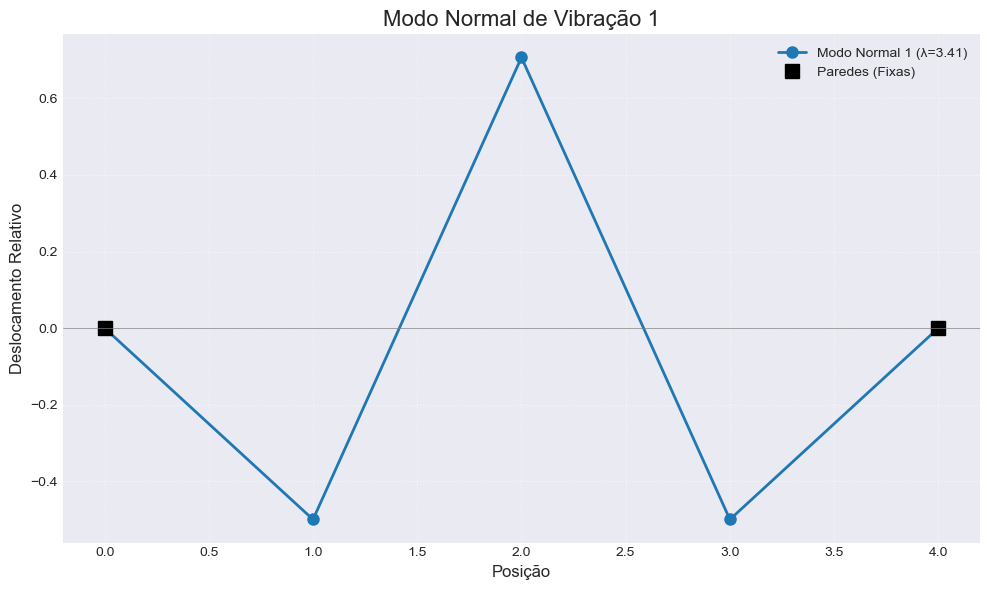

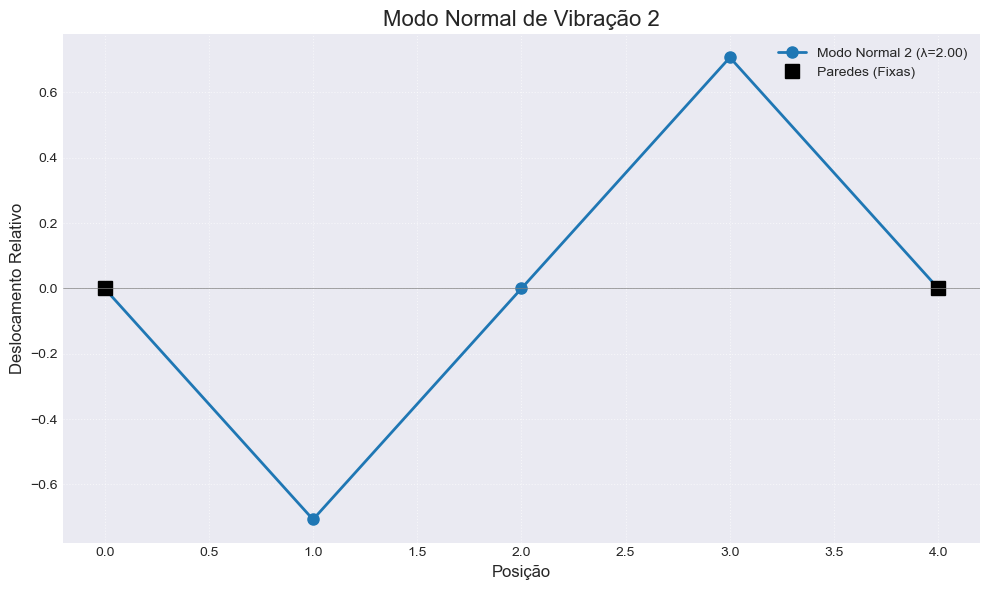

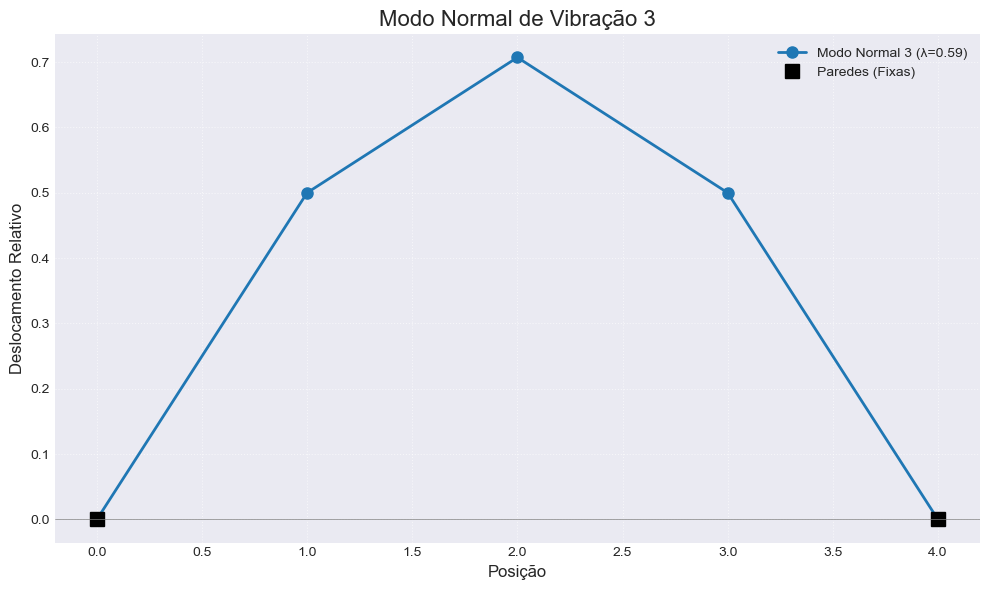

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

# Definindo as massas e as constantes das molas
m1 = 1
m2 = 1
m3 = 1
k = 1   # Constante das molas ENTRE as massas
kp = 1  # Constante das molas CONECTADAS ÀS PAREDES (exemplo: kp=2, diferente de k=1)

# Matriz B para três massas com molas de parede diferentes
B = np.array([
    [(kp + k) / m1, -k / m1, 0],
    [-k / m2, (2 * k) / m2, -k / m2],
    [0, -k / m3, (k + kp) / m3]
])

# Calculando autovalores e autovetores
autovalores, autovetores = eig(B)

# Posições das massas e das paredes para o gráfico
# Adicionamos pontos para as paredes nas posições 0 e 4
posicao_completa = [0, 1, 2, 3, 4]

# Plotando os modos normais com os pontos da parede
plt.style.use('seaborn-v0_8-darkgrid') # Um estilo limpo para os gráficos

print("Autovalores (frequências quadradas):", autovalores)
print("Autovetores (modos normais):\n", autovetores)

for i in range(len(autovetores[0])):
    plt.figure(figsize=(10, 6))

    # O deslocamento das paredes é sempre zero
    deslocamento_modo = np.insert(autovetores[:, i], 0, 0) # Adiciona 0 no início (parede esquerda)
    deslocamento_modo = np.append(deslocamento_modo, 0)   # Adiciona 0 no final (parede direita)

    # Plotagem da linha e marcadores para o modo normal
    plt.plot(posicao_completa, deslocamento_modo, 'o-',
             label=f'Modo Normal {i+1} (λ={autovalores[i]:.2f})',
             markersize=8, linewidth=2)

    # Plotagem dos pontos que representam as paredes
    plt.plot([0, 4], [0, 0], 's', color='black', markersize=10, label='Paredes (Fixas)')

    # Linha de referência em y=0
    plt.axhline(0, color='gray', lw=0.5, ls='-')

    plt.title(f'Modo Normal de Vibração {i+1}', fontsize=16)
    plt.xlabel('Posição', fontsize=12)
    plt.ylabel('Deslocamento Relativo', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.tight_layout()
    plt.show()

Autovalores (frequências quadradas): [1.55051026 6.         6.44948974]
Autovetores (modos normais):
 [[ 2.14186495e-01 -7.07106781e-01  6.73887339e-01]
 [ 9.53020614e-01  6.18855014e-16 -3.02905447e-01]
 [ 2.14186495e-01  7.07106781e-01  6.73887339e-01]]


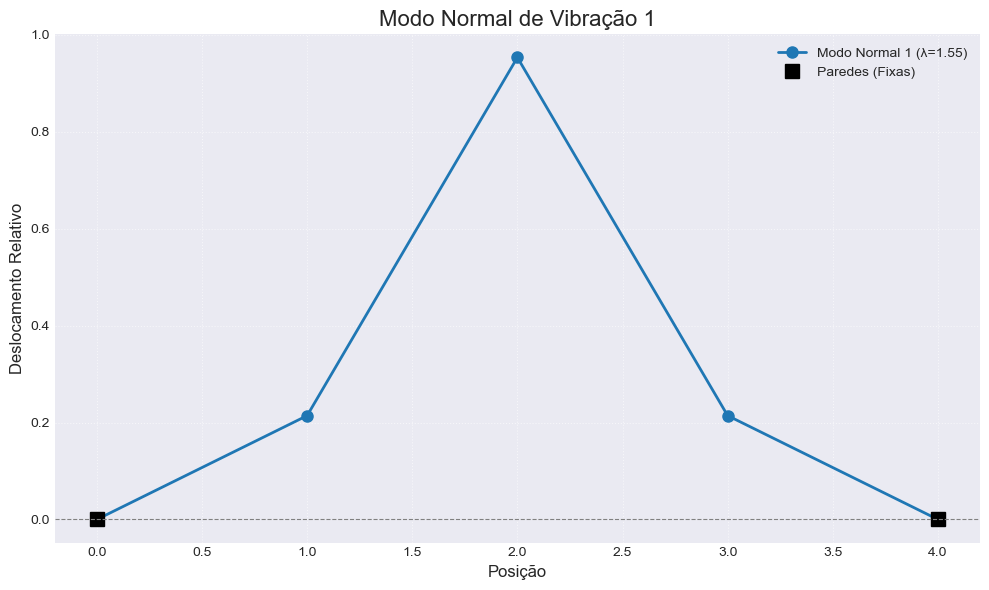

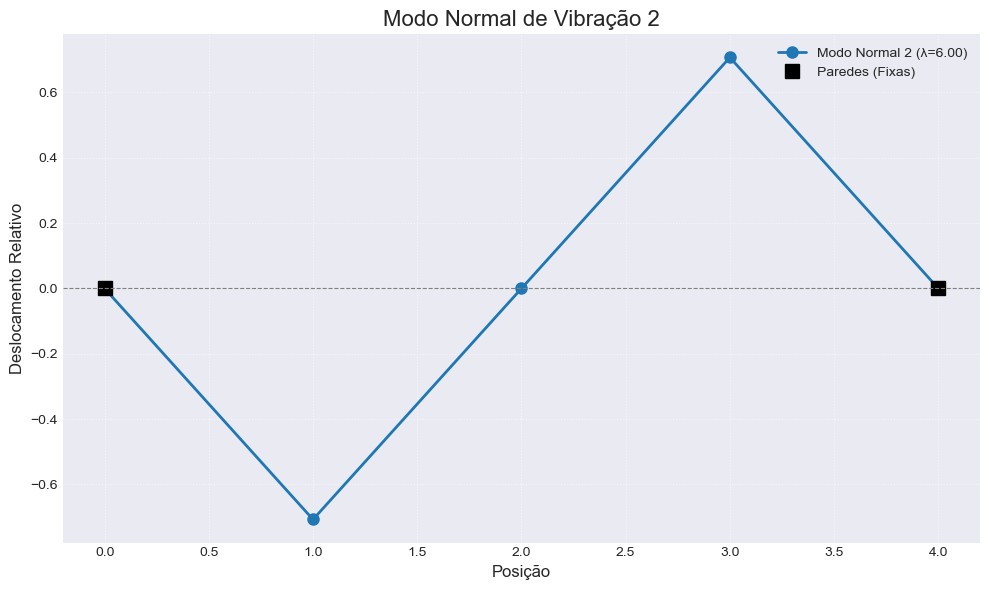

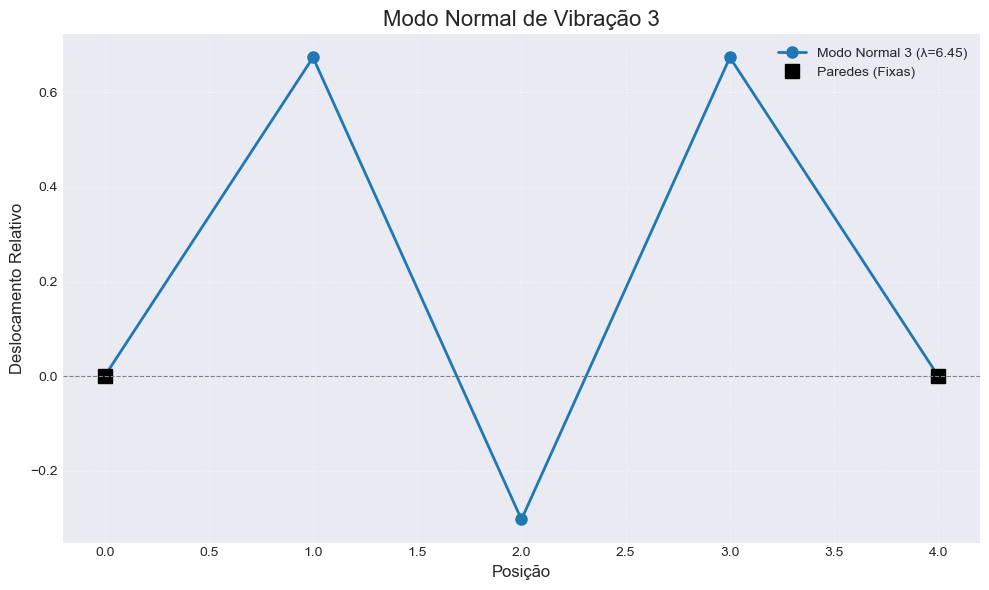

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

# Definindo as massas e as constantes das molas
m1 = 1
m2 = 1
m3 = 1
k = 1   # Constante das molas ENTRE as massas
kp = 5  # Constante das molas CONECTADAS ÀS PAREDES (exemplo: kp=2, diferente de k=1)

# Matriz B para três massas com molas de parede diferentes
B = np.array([
    [(kp + k) / m1, -k / m1, 0],
    [-k / m2, (2 * k) / m2, -k / m2],
    [0, -k / m3, (k + kp) / m3]
])

# Calculando autovalores e autovetores
autovalores, autovetores = eig(B)

# Posições das massas e das paredes para o gráfico
# Adicionamos pontos para as paredes nas posições 0 e 4
posicao_completa = [0, 1, 2, 3, 4]

# Plotando os modos normais com os pontos da parede
plt.style.use('seaborn-v0_8-darkgrid') # Um estilo limpo para os gráficos

print("Autovalores (frequências quadradas):", autovalores)
print("Autovetores (modos normais):\n", autovetores)

for i in range(len(autovetores[0])):
    plt.figure(figsize=(10, 6))

    # O deslocamento das paredes é sempre zero
    deslocamento_modo = np.insert(autovetores[:, i], 0, 0) # Adiciona 0 no início (parede esquerda)
    deslocamento_modo = np.append(deslocamento_modo, 0)   # Adiciona 0 no final (parede direita)

    # Plotagem da linha e marcadores para o modo normal
    plt.plot(posicao_completa, deslocamento_modo, 'o-',
             label=f'Modo Normal {i+1} (λ={autovalores[i]:.2f})',
             markersize=8, linewidth=2)

    # Plotagem dos pontos que representam as paredes
    plt.plot([0, 4], [0, 0], 's', color='black', markersize=10, label='Paredes (Fixas)')

    # Linha de referência em y=0
    plt.axhline(0, color='gray', lw=0.8, ls='--')

    plt.title(f'Modo Normal de Vibração {i+1}', fontsize=16)
    plt.xlabel('Posição', fontsize=12)
    plt.ylabel('Deslocamento Relativo', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.tight_layout()
    plt.show()

<>:44: SyntaxWarning: invalid escape sequence '\o'
<>:48: SyntaxWarning: invalid escape sequence '\o'
<>:52: SyntaxWarning: invalid escape sequence '\o'
<>:58: SyntaxWarning: invalid escape sequence '\o'
<>:44: SyntaxWarning: invalid escape sequence '\o'
<>:48: SyntaxWarning: invalid escape sequence '\o'
<>:52: SyntaxWarning: invalid escape sequence '\o'
<>:58: SyntaxWarning: invalid escape sequence '\o'
C:\Users\luiz.daniel\AppData\Local\Temp\ipykernel_12864\1967161134.py:44: SyntaxWarning: invalid escape sequence '\o'
  label='$\omega_1$ (Modo 1 - Menor Frequência)',
C:\Users\luiz.daniel\AppData\Local\Temp\ipykernel_12864\1967161134.py:48: SyntaxWarning: invalid escape sequence '\o'
  label='$\omega_2$ (Modo 2 - Frequência Média)',
C:\Users\luiz.daniel\AppData\Local\Temp\ipykernel_12864\1967161134.py:52: SyntaxWarning: invalid escape sequence '\o'
  label='$\omega_3$ (Modo 3 - Maior Frequência)',
C:\Users\luiz.daniel\AppData\Local\Temp\ipykernel_12864\1967161134.py:58: SyntaxWarning:

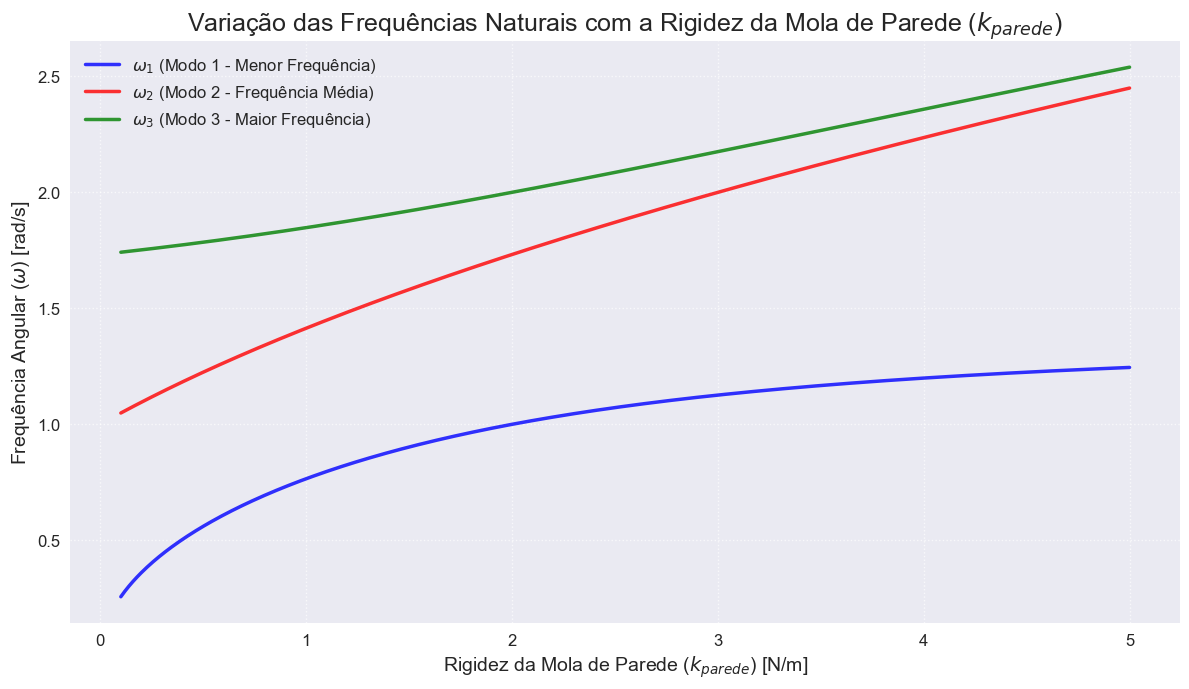

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

# --- ANÁLISE 7: Variando as Molas das Paredes Simetricamente ---
massas = np.array([1.0, 1.0, 1.0])
M = np.diag(massas)

k_fixa_interna = 1.0  # Molas internas constantes
k_parede_range = np.linspace(0.1, 5.0, 500) # Intervalo da rigidez das molas da parede

omegas_1, omegas_2, omegas_3 = [], [], []

for k_parede in k_parede_range:
    # Matriz de Rigidez K com molas de parede variáveis
    K = np.array([
        [k_parede + k_fixa_interna, -k_fixa_interna, 0],
        [-k_fixa_interna, k_fixa_interna + k_fixa_interna, -k_fixa_interna],
        [0, -k_fixa_interna, k_fixa_interna + k_parede]
    ])
    
    # Resolve o sistema M*ddot(x) + K*x = 0
    # Equivalente a ddot(x) = -inv(M)*K*x
    M_inv = np.linalg.inv(M)
    sistema = np.dot(M_inv, K)
    
    # Autovalores do sistema são as frequências angulares ao quadrado (omega^2)
    autovalores_quadrados, _ = eig(sistema)
    
    # As frequências naturais são a raiz quadrada dos autovalores
    # Ordena para garantir que omegas[0] seja omega_1, omegas[1] seja omega_2, etc.
    omegas = np.sqrt(np.sort(autovalores_quadrados)) 
    
    omegas_1.append(omegas[0])
    omegas_2.append(omegas[1])
    omegas_3.append(omegas[2])

# --- Gráfico das Frequências vs. Rigidez das Molas de Parede ---
plt.figure(figsize=(12, 7)) # Aumenta o tamanho da figura para melhor visualização
plt.style.use('seaborn-v0_8-darkgrid') # Aplica um estilo moderno com grade

# Plotando as frequências
plt.plot(k_parede_range, omegas_1, 
         label='$\omega_1$ (Modo 1 - Menor Frequência)', 
         color='blue', linewidth=2.5, alpha=0.8) # Cores e espessuras customizadas

plt.plot(k_parede_range, omegas_2, 
         label='$\omega_2$ (Modo 2 - Frequência Média)', 
         color='red', linewidth=2.5, alpha=0.8, linestyle='-') # Linha tracejada para diferenciar

plt.plot(k_parede_range, omegas_3, 
         label='$\omega_3$ (Modo 3 - Maior Frequência)', 
         color='green', linewidth=2.5, alpha=0.8, linestyle='-') # Linha ponto-traço para diferenciar

# Adicionando rótulos e título
plt.title('Variação das Frequências Naturais com a Rigidez da Mola de Parede ($k_{parede}$)', fontsize=18)
plt.xlabel('Rigidez da Mola de Parede ($k_{parede}$) [N/m]', fontsize=14)
plt.ylabel('Frequência Angular ($\omega$) [rad/s]', fontsize=14)

# Adicionando legenda e grid
plt.legend(fontsize=12, loc='upper left') # Posição da legenda
plt.grid(True, linestyle=':', alpha=0.7) # Grade mais suave

# Ajustes finais para o layout
plt.tick_params(axis='both', which='major', labelsize=12) # Tamanho das legendas dos eixos
plt.tight_layout() # Ajusta para evitar cortes
plt.show()

Autovalores (frequências quadradas): [15.34846923  6.          0.65153077]
Autovetores (modos normais):
 [[-4.26566077e-01 -7.07106781e-01  5.63951577e-01]
 [ 7.97547969e-01 -2.48849130e-16  6.03255532e-01]
 [-4.26566077e-01  7.07106781e-01  5.63951577e-01]]


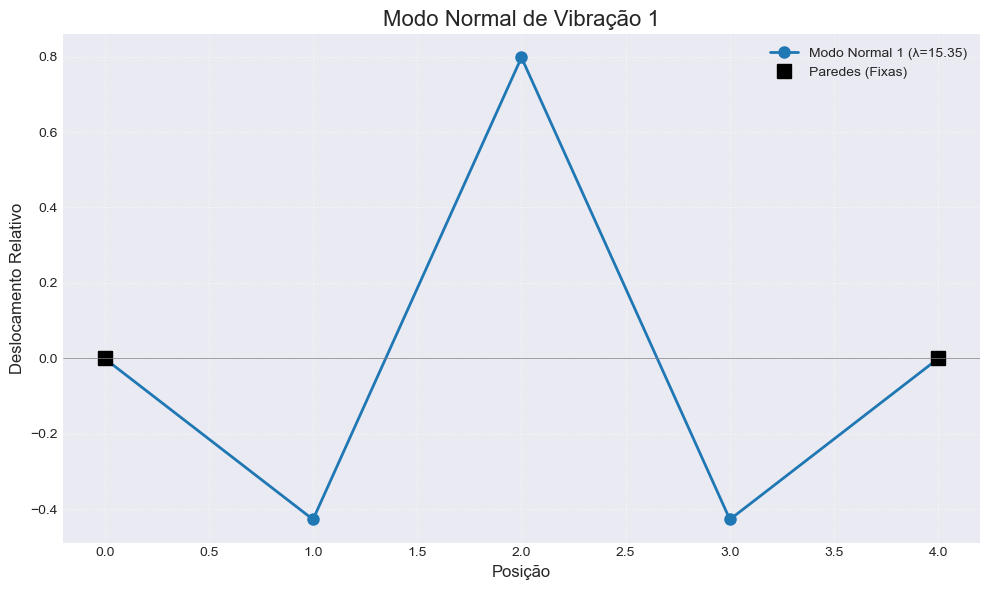

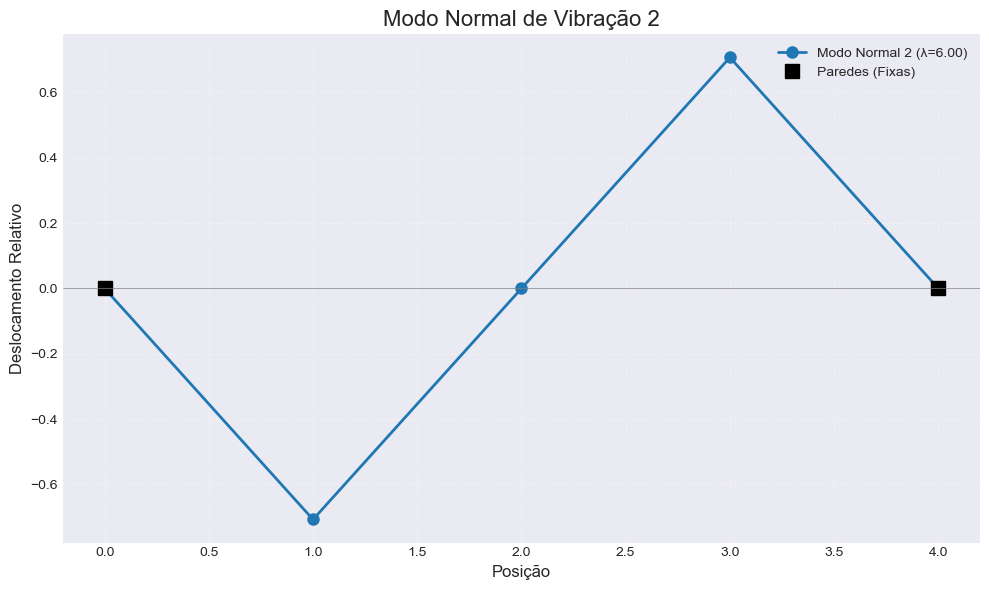

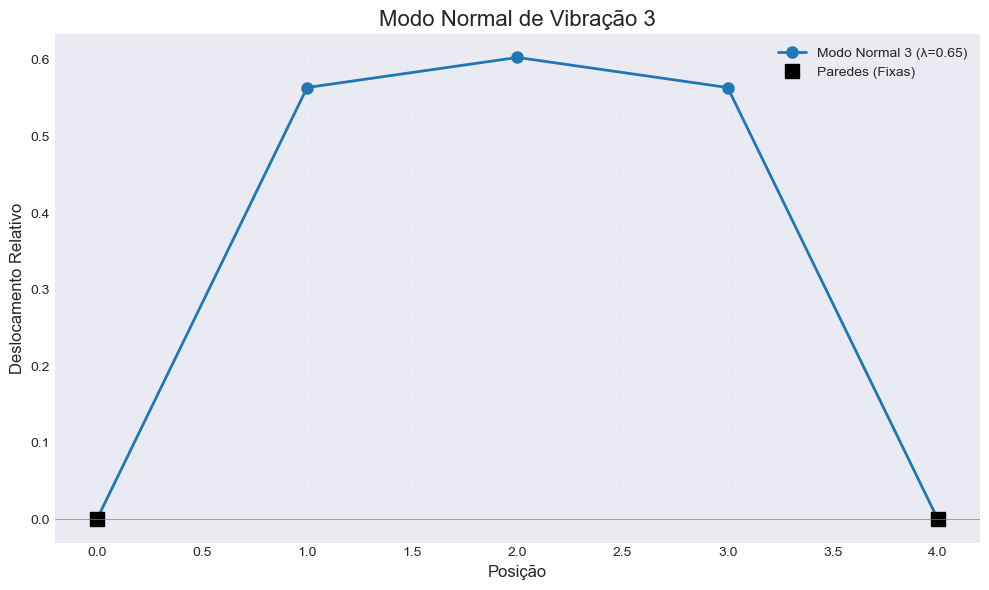

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

# Definindo as massas e as constantes das molas
m1 = 1
m2 = 1
m3 = 1
k = 5   # Constante das molas ENTRE as massas
kp = 1  # Constante das molas CONECTADAS ÀS PAREDES 

# Matriz B para três massas com molas de parede diferentes
B = np.array([
    [(kp + k) / m1, -k / m1, 0],
    [-k / m2, (2 * k) / m2, -k / m2],
    [0, -k / m3, (k + kp) / m3]
])

# Calculando autovalores e autovetores
autovalores, autovetores = eig(B)

# Posições das massas e das paredes para o gráfico
# Adicionamos pontos para as paredes nas posições 0 e 4
posicao_completa = [0, 1, 2, 3, 4]

# Plotando os modos normais com os pontos da parede
plt.style.use('seaborn-v0_8-darkgrid') # Um estilo limpo para os gráficos

print("Autovalores (frequências quadradas):", autovalores)
print("Autovetores (modos normais):\n", autovetores)

for i in range(len(autovetores[0])):
    plt.figure(figsize=(10, 6))

    # O deslocamento das paredes é sempre zero
    deslocamento_modo = np.insert(autovetores[:, i], 0, 0) # Adiciona 0 no início (parede esquerda)
    deslocamento_modo = np.append(deslocamento_modo, 0)   # Adiciona 0 no final (parede direita)

    # Plotagem da linha e marcadores para o modo normal
    plt.plot(posicao_completa, deslocamento_modo, 'o-',
             label=f'Modo Normal {i+1} (λ={autovalores[i]:.2f})',
             markersize=8, linewidth=2)

    # Plotagem dos pontos que representam as paredes
    plt.plot([0, 4], [0, 0], 's', color='black', markersize=10, label='Paredes (Fixas)')

    # Linha de referência em y=0
    plt.axhline(0, color='gray', lw=0.5, ls='-')

    plt.title(f'Modo Normal de Vibração {i+1}', fontsize=16)
    plt.xlabel('Posição', fontsize=12)
    plt.ylabel('Deslocamento Relativo', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.tight_layout()
    plt.show()

Vou separar as análises por cada tópico:

### Duas massas

Aqui temos duas soluções a trivial e a que devemos análisar. A frequência decresce da forma 1/x como esperado ao aumentar uma das massas.

### Três massas

Ao manter todas constantes observamos que a frequência angular tem sempre o mesmo comportamento de 1/x variando a menos de uma constante.

Quando a massa do meio (m_2) é maior que as outras temos três casos:

- i) O primeiro modo normal decresce com ordem maior que 1/x
- ii) O segundo modo normal cresce de forma lenta, pois a dinâmica das massas m_1 e m_3 será antisimétria, ou seja, vão se mover em sentidos diferentes.
- iii) O terceiro modo normal também decresce de maneira muito lenda, mas representa um regime parecido com o primeiro.

Quando uma das massas das pontas (m_1 e m_3) é superior as outras a queda frequencia tambem será de ordem superior a 1/x.

Quando todas as massas são diferentes não há grandes variações no comportamento. Logo, concluí-se que a criação de simetrias que gera comportamentos estranhos.


### Variando a rigidez


Ao variar a rigidez das molas do centro, o comportamento das frequências é crescer na ordem de x^{1/2} o que é esperado devido ao caso clássico do oscilador harmônico.

Se variarmos as molas das paredes, o crescimento é mais expressivo o que é esperado devido ao conhecimento no modelo de uma mola 